In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
DNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'weighted')
RNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'weighted')
dna_dt = DNA_inside_w.iloc[:135].copy()
rna_dt = RNA_inside_w.iloc[:133].copy()

In [3]:
dna_data = DNA_inside_w[['gene', 'weight_score']].rename(columns = {'weight_score':'score'})
rna_data = RNA_inside_w[['gene', 'weight_score']].rename(columns = {'weight_score':'score'})

### qqplot

In [12]:
dna_ExpectedScore_r = np.linspace(start = dna_data_v1['score'].min(), stop = dna_data_v1['score'].max(), num = len(dna_data_v1), retstep = True)[0]
dna_ExpectedScore = dna_ExpectedScore_r[::-1]

rna_ExpectedScore_r = np.linspace(start = rna_data_v1['score'].min(), stop = rna_data_v1['score'].max(), num = len(rna_data_v1), retstep = True)[0]
rna_ExpectedScore = rna_ExpectedScore_r[::-1]

In [13]:
dna_data_v1['expected_score'] = dna_ExpectedScore
rna_data_v1['expected_score'] = rna_ExpectedScore

In [17]:
dna_data_v1

gene      score  expected_score
0      Glyma.13g208000  27.876972       27.876972
1      Glyma.04g200900  27.783805       27.876470
2      Glyma.05g128000  27.675947       27.875967
3      Glyma.14g031000  25.896886       27.875464
4      Glyma.15g055500  25.790729       27.874962
...                ...        ...             ...
55459  Glyma.01g101300   0.000411        0.002021
55460  Glyma.10g173400   0.000226        0.001518
55461  Glyma.12g172000   0.000201        0.001016
55462  Glyma.03g116300   0.000194        0.000513
55463  Glyma.11g223900   0.000011        0.000011

[55464 rows x 3 columns]

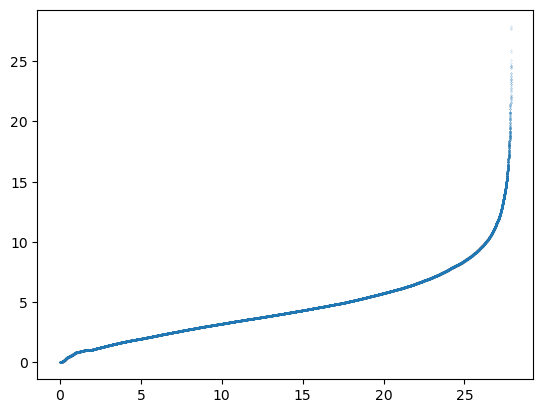

In [23]:
plt.scatter(x = dna_data_v1['expected_score'], y = dna_data_v1['score'], marker = 'o', s = 0.01)
plt.show()

In [4]:
dna_ExpectedScore_r = np.linspace(start = dna_data['score'].min(), stop = dna_data['score'].max(), num = len(dna_data), retstep = True)[0]
dna_ExpectedScore = dna_ExpectedScore_r[::-1]

rna_ExpectedScore_r = np.linspace(start = rna_data['score'].min(), stop = rna_data['score'].max(), num = len(rna_data), retstep = True)[0]
rna_ExpectedScore = rna_ExpectedScore_r[::-1]

In [5]:
len(dna_data), len(rna_data), len(dna_ExpectedScore), len(rna_ExpectedScore)

(55465, 54086, 55465, 54086)

In [6]:
dna_data['expected_score'] = dna_ExpectedScore
rna_data['expected_score'] = rna_ExpectedScore

In [7]:
dna_data

gene      score  expected_score
0      Glyma.07g100500  29.107152       29.107152
1      Glyma.13g208000  27.876972       29.106627
2      Glyma.04g200900  27.783805       29.106102
3      Glyma.05g128000  27.675947       29.105577
4      Glyma.14g031000  25.896886       29.105052
...                ...        ...             ...
55460  Glyma.01g101300   0.000411        0.002110
55461  Glyma.10g173400   0.000226        0.001585
55462  Glyma.12g172000   0.000201        0.001060
55463  Glyma.03g116300   0.000194        0.000535
55464  Glyma.11g223900   0.000011        0.000011

[55465 rows x 3 columns]

In [119]:
from sklearn import preprocessing
dna_data['norm_score'] = preprocessing.normalize([dna_data['score']])[0]
rna_data['norm_score'] = preprocessing.normalize([rna_data['score']])[0]

In [128]:
# rescale score
def scale_score(x, upper_b, lower_b, max_val, min_val):
    scaling = (upper_b - lower_b) / (max_val - min_val)
    return (x - min_val) * scaling + lower_b

In [131]:
upper_b, lower_b, max_val, min_val = 6, 0, dna_data['score'].max(), 0
dna_data['rescale_score'] = dna_data['score'].apply(scale_score, args = (upper_b, lower_b, max_val, min_val))

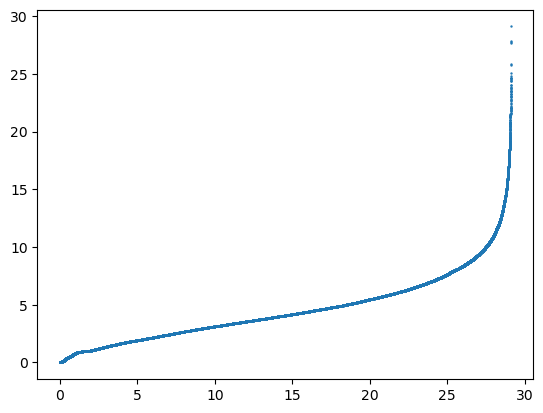

In [124]:
plt.scatter(x = dna_data['expected_score'], y = dna_data['score'], marker = 'o', s = 0.5)
plt.show()

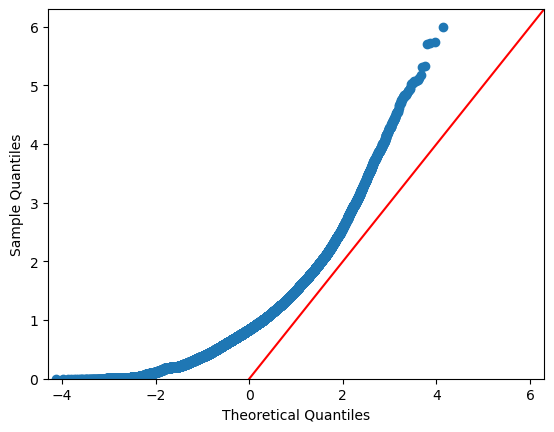

In [137]:
sm.qqplot(dna_data['rescale_score'], line = '45')
plt.ylim(0)
plt.show()

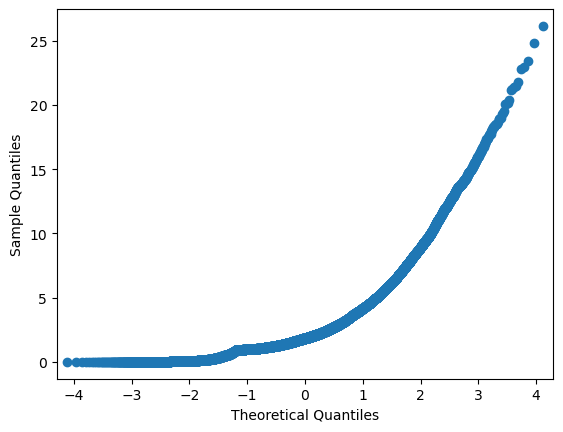

In [34]:
sm.qqplot(rna_data['score'])
plt.show()

## total score (hist merged with scatter plot)

In [13]:
# calculate number of DTgenes in different combined_score range
n_rnascore_0to3 = len(rna_data[(rna_data['score'] >= 0) & (rna_data['score'] < 3)]['gene'])
n_rnascore_3to6 = len(rna_data[(rna_data['score'] >= 3) & (rna_data['score'] < 6)]['gene'])
n_rnascore_6to9 = len(rna_data[(rna_data['score'] >= 6) & (rna_data['score'] < 9)]['gene'])
n_rnascore_9to12 = len(rna_data[(rna_data['score'] >= 9) & (rna_data['score'] < 12)]['gene'])
n_rnascore_12to15 = len(rna_data[(rna_data['score'] >= 12) & (rna_data['score'] < 15)]['gene'])
n_rnascore_15to18 = len(rna_data[(rna_data['score'] >= 15) & (rna_data['score'] < 18)]['gene'])
n_rnascore_18to21 = len(rna_data[(rna_data['score'] >= 18) & (rna_data['score'] < 21)]['gene'])
n_rnascore_21to24 = len(rna_data[(rna_data['score'] >= 21) & (rna_data['score'] < 24)]['gene'])
n_rnascore_24to27 = len(rna_data[(rna_data['score'] >= 24) & (rna_data['score'] < 27)]['gene'])
# n_rnascore_27to30 = len(rna_data[(rna_data['score'] >= 27) & (rna_data['score'] < 30)]['gene'])
print('number of genes in different score range: 0~3 {}, 3~6 {}, 6~9 {}, 9~12 {}, 12~15 {}, 15~18 {}, 18~21 {}, 21~24 {}, 24~27 {}'
     .format(n_rnascore_0to3, n_rnascore_3to6, n_rnascore_6to9, n_rnascore_9to12, n_rnascore_12to15, n_rnascore_15to18, n_rnascore_18to21
            , n_rnascore_21to24, n_rnascore_24to27))

number of genes in different score range: 0~3 39599, 3~6 10618, 6~9 2671, 9~12 797, 12~15 294, 15~18 74, 18~21 23, 21~24 8, 24~27 2


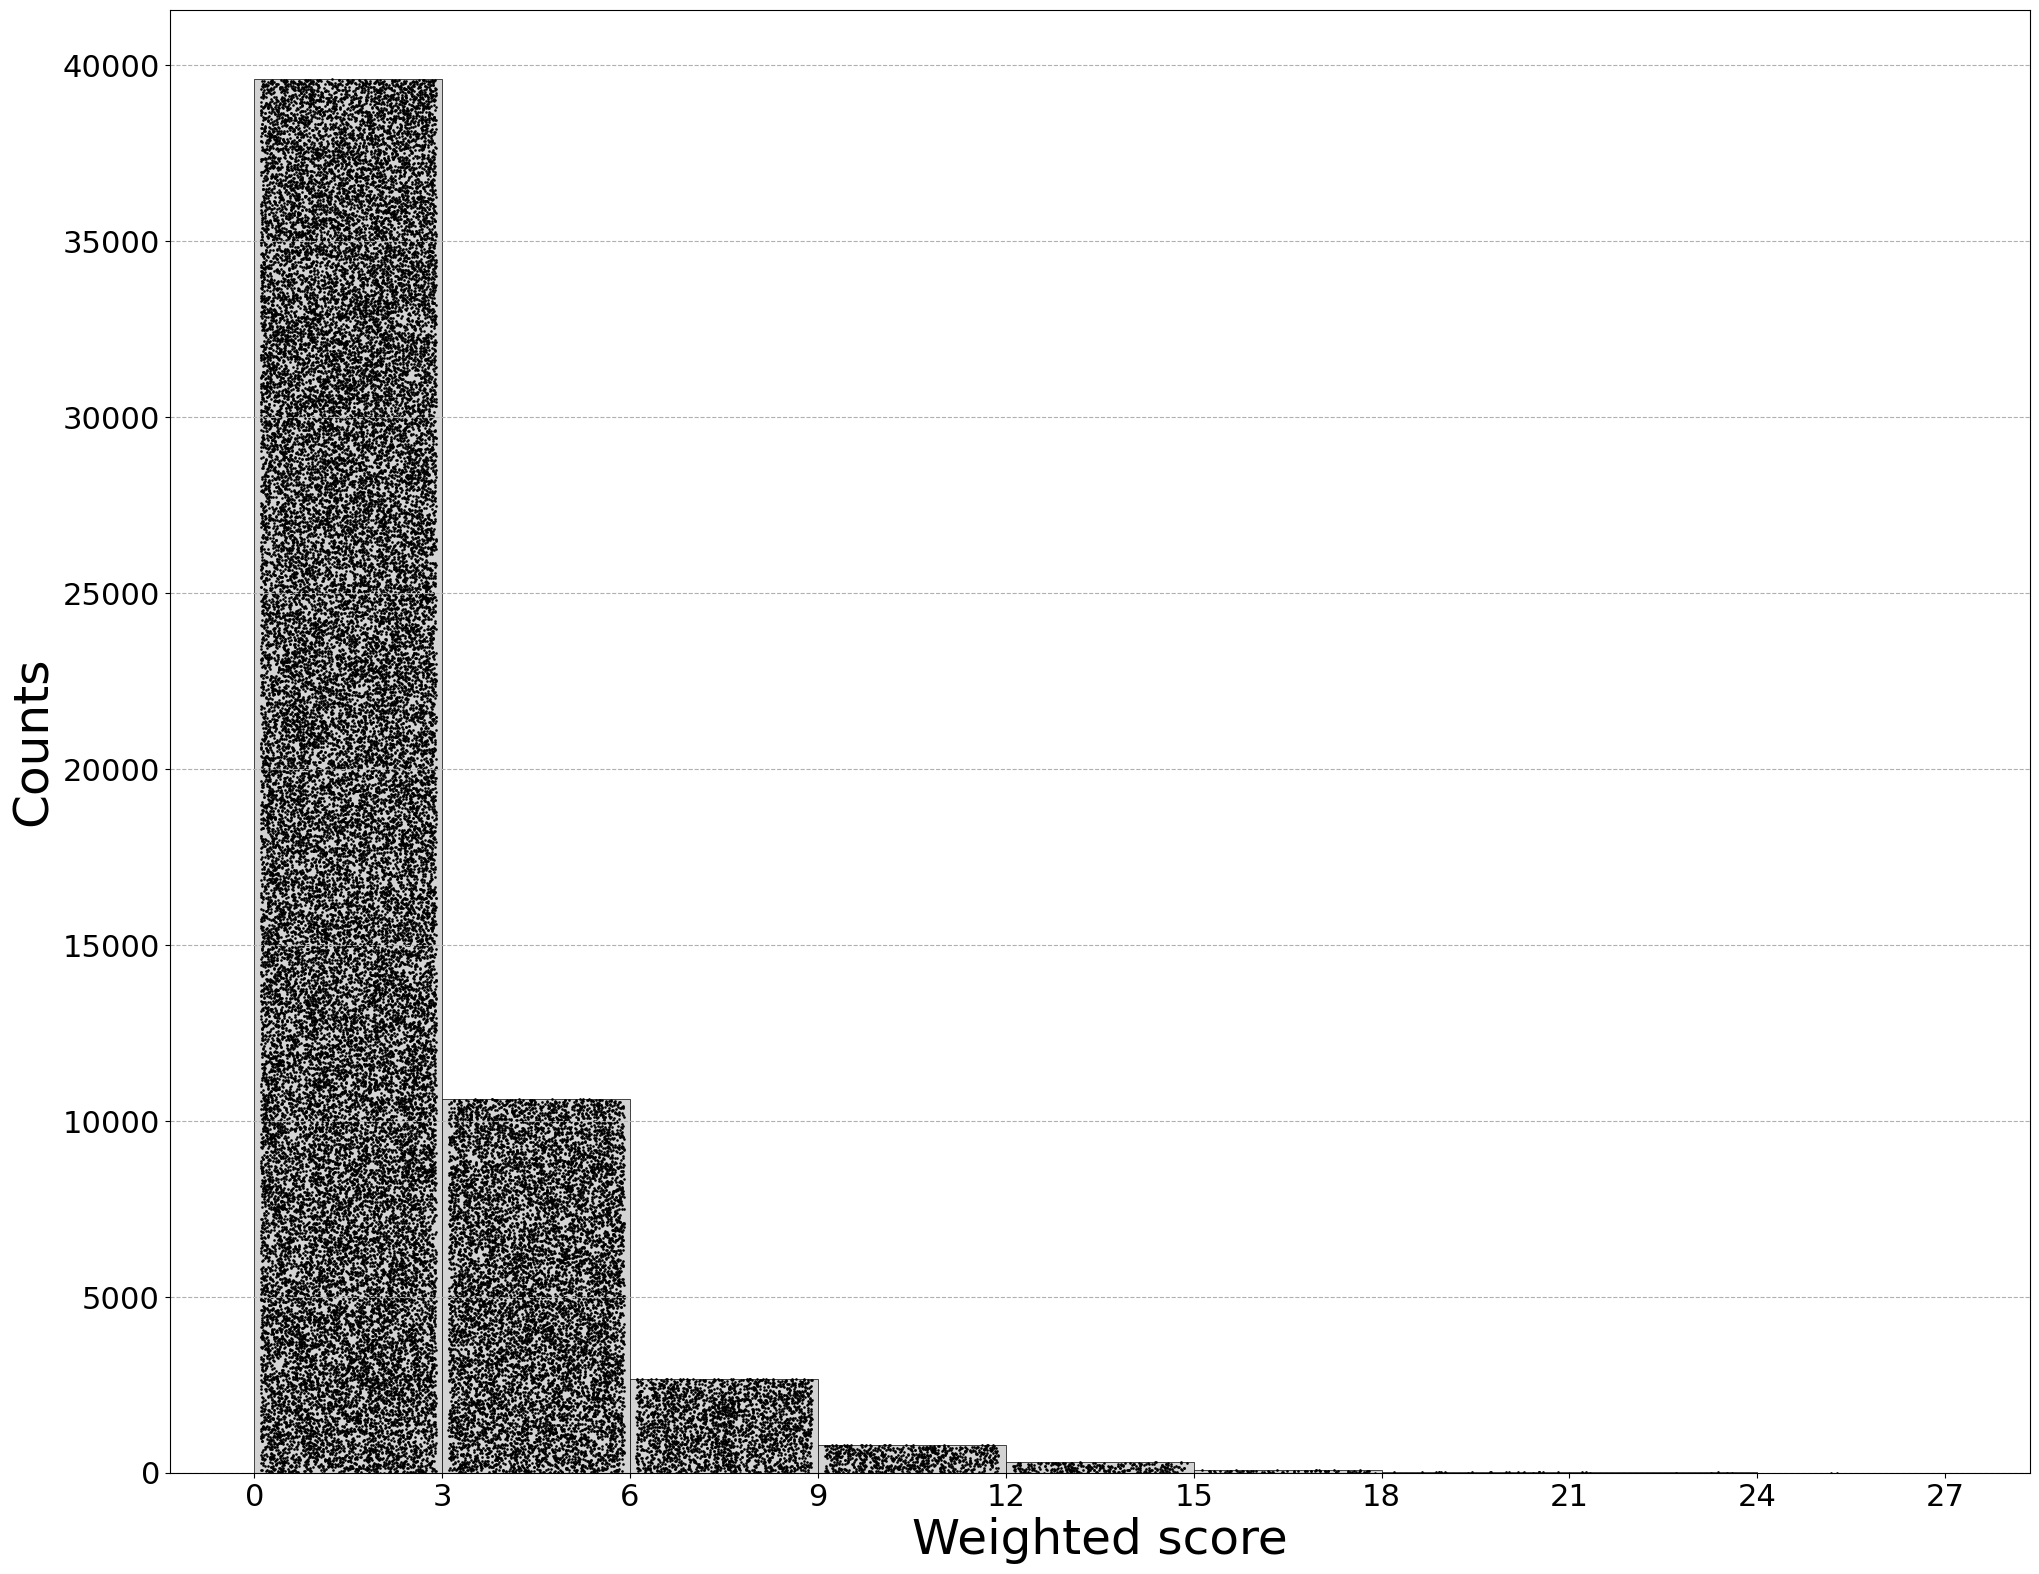

In [41]:
plt.figure(figsize = (24, 19))
bins_list = [i for i in range(0, 30, 3)]
plt.hist(rna_data['score'], bins = bins_list, edgecolor = 'black', linewidth = 0.5, color = 'lightgray')
dot_size = 0.8

lb = 0; ub = 3
lb_x = 0.1; ub_x = 2.9
for i in range(9):
    n_size = len(rna_data[(rna_data['score'] >= lb) & (rna_data['score'] < ub)]['gene'])
    x_arr = np.random.uniform(low = lb_x, high = ub_x, size = n_size)
    y_arr = np.random.uniform(low = 1, high = n_size - 1, size = n_size)
    plt.scatter(x = x_arr, y = y_arr, marker = 'o', s = dot_size, color = 'black')
    lb += 3; ub += 3
    lb_x += 3; ub_x += 3

plt.xlabel('Weighted score', fontsize = 35)
plt.ylabel('Counts', fontsize = 35)
plt.xticks(bins_list, fontsize = 22)
plt.yticks(fontsize = 22)
plt.grid(linestyle = '--', axis = 'y')
plt.savefig(r"C:\Users\edwar\Downloads\fig4b.jpg", dpi = 400, format = 'jpg', bbox_inches = 'tight')
# plt.show()

In [21]:
RNA_inside_w['weight'].describe()  # [0.7, 1.8]

count    54086.000000
mean         1.018121
std          0.142373
min          0.700000
25%          0.900000
50%          1.000000
75%          1.100000
max          1.800000
Name: weight, dtype: float64

Original

In [25]:
# calculate number of DTgenes in different combined_score range
n_dnascore_0to3 = len(dna_data[(dna_data['score'] >= 0) & (dna_data['score'] < 3)]['gene'])
n_dnascore_3to6 = len(dna_data[(dna_data['score'] >= 3) & (dna_data['score'] < 6)]['gene'])
n_dnascore_6to9 = len(dna_data[(dna_data['score'] >= 6) & (dna_data['score'] < 9)]['gene'])
n_dnascore_9to12 = len(dna_data[(dna_data['score'] >= 9) & (dna_data['score'] < 12)]['gene'])
n_dnascore_12to15 = len(dna_data[(dna_data['score'] >= 12) & (dna_data['score'] < 15)]['gene'])
n_dnascore_15to18 = len(dna_data[(dna_data['score'] >= 15) & (dna_data['score'] < 18)]['gene'])
n_dnascore_18to21 = len(dna_data[(dna_data['score'] >= 18) & (dna_data['score'] < 21)]['gene'])
n_dnascore_21to24 = len(dna_data[(dna_data['score'] >= 21) & (dna_data['score'] < 24)]['gene'])
n_dnascore_24to27 = len(dna_data[(dna_data['score'] >= 24) & (dna_data['score'] < 27)]['gene'])
n_dnascore_27to30 = len(dna_data[(dna_data['score'] >= 27) & (dna_data['score'] < 30)]['gene'])
print('number of genes in different score range: 0~3 {}, 3~6 {}, 6~9 {}, 9~12 {}, 12~15 {}, 15~18 {}, 18~21 {}, 21~24 {}, 24~27 {}, and 27~30 {}'
     .format(n_dnascore_0to3, n_dnascore_3to6, n_dnascore_6to9, n_dnascore_9to12, n_dnascore_12to15, n_dnascore_15to18, n_dnascore_18to21
            , n_dnascore_21to24, n_dnascore_24to27, n_dnascore_27to30))

number of genes in different score range: 0~3 17953, 3~6 23233, 6~9 9705, 9~12 3098, 12~15 925, 15~18 338, 18~21 146, 21~24 51, 24~27 12, and 27~30 4


In [27]:
x_0to3 = np.random.uniform(low = 0.1, high = 2.9, size = n_dnascore_0to3)
x_3to6 = np.random.uniform(low = 3.1, high = 5.9, size = n_dnascore_3to6)
x_6to9 = np.random.uniform(low = 6.1, high = 8.9, size = n_dnascore_6to9)
x_9to12 = np.random.uniform(low = 9.1, high = 11.9, size = n_dnascore_9to12)
x_12to15 = np.random.uniform(low = 12.1, high = 14.9, size = n_dnascore_12to15)
x_15to18 = np.random.uniform(low = 15.1, high = 17.9, size = n_dnascore_15to18)
x_18to21 = np.random.uniform(low = 18.1, high = 20.9, size = n_dnascore_18to21)
x_21to24 = np.random.uniform(low = 21.1, high = 23.9, size = n_dnascore_21to24)
x_24to27 = np.random.uniform(low = 24.1, high = 26.9, size = n_dnascore_24to27)
x_27to30 = np.random.uniform(low = 27.1, high = 29.2, size = n_dnascore_27to30)

In [29]:
y_0to3 = np.random.uniform(low = 1, high = n_dnascore_0to3 - 1, size = n_dnascore_0to3)
y_3to6 = np.random.uniform(low = 1, high = n_dnascore_3to6 - 1, size = n_dnascore_3to6)
y_6to9 = np.random.uniform(low = 1, high = n_dnascore_6to9 - 1, size = n_dnascore_6to9)
y_9to12 = np.random.uniform(low = 1, high = n_dnascore_9to12 - 1, size = n_dnascore_9to12)
y_12to15 = np.random.uniform(low = 1, high = n_dnascore_12to15 - 1, size = n_dnascore_12to15)
y_15to18 = np.random.uniform(low = 1, high = n_dnascore_15to18 - 1, size = n_dnascore_15to18)
y_18to21 = np.random.uniform(low = 1, high = n_dnascore_18to21 - 1, size = n_dnascore_18to21)
y_21to24 = np.random.uniform(low = 1, high = n_dnascore_21to24 - 1, size = n_dnascore_21to24)
y_24to27 = np.random.uniform(low = 1, high = n_dnascore_24to27 - 1, size = n_dnascore_24to27)
y_27to30 = np.random.uniform(low = 1, high = n_dnascore_27to30 - 1, size = n_dnascore_27to30)

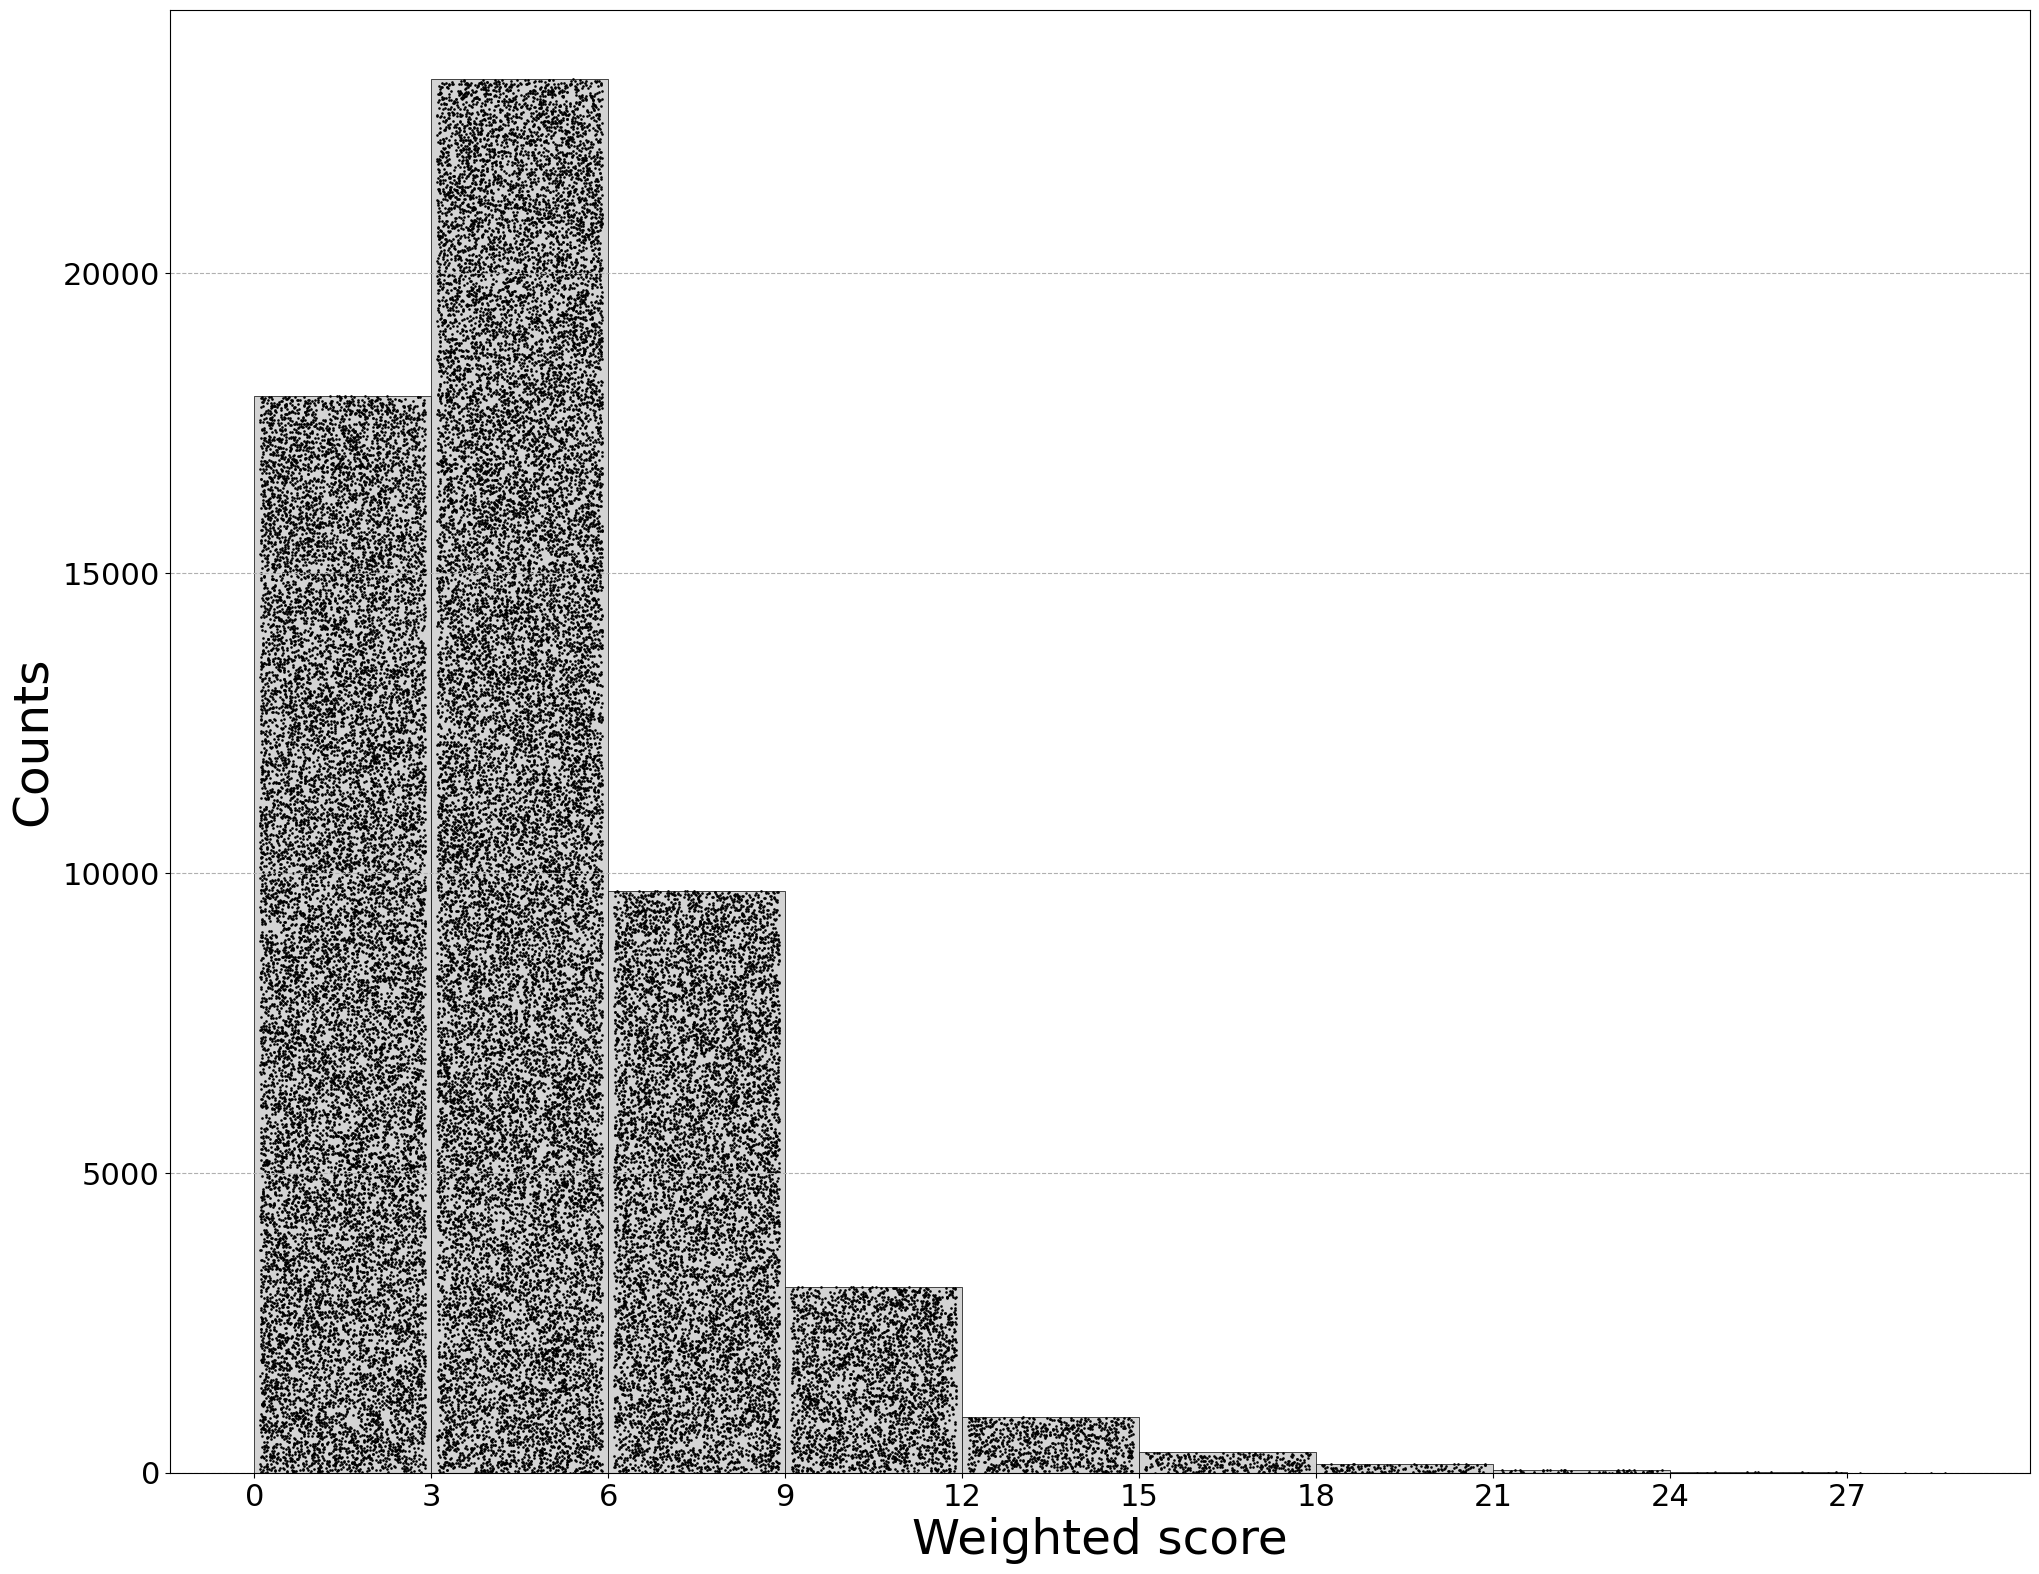

In [43]:
plt.figure(figsize = (24, 19))
bins_list = [i for i in range(0, 30, 3)]
plt.hist(dna_data['score'], bins = bins_list, edgecolor = 'black', linewidth = 0.5, color = 'lightgray')
dot_size = 0.8
plt.scatter(x = x_0to3, y = y_0to3, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_3to6, y = y_3to6, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_6to9, y = y_6to9, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_9to12, y = y_9to12, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_12to15, y = y_12to15, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_15to18, y = y_15to18, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_18to21, y = y_18to21, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_21to24, y = y_21to24, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_24to27, y = y_24to27, marker = 'o', s = dot_size, color = 'black')
plt.scatter(x = x_27to30, y = y_27to30, marker = 'o', s = dot_size, color = 'black')
plt.xlabel('Weighted score', fontsize = 35)
plt.ylabel('Counts', fontsize = 35)
plt.xticks(bins_list, fontsize = 22)
plt.yticks(fontsize = 22)
plt.grid(linestyle = '--', axis = 'y')
# plt.show()
plt.savefig(r"C:\Users\edwar\Downloads\fig4a.jpg", dpi = 400, format = 'jpg', bbox_inches = 'tight')

### chromosome figs

In [4]:
key_genes = list(pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\final_DTgenes.xlsx")['key_genes'])

In [5]:
dna_dtgenes = list(dna_dt['gene'])
rna_dtgenes = list(rna_dt['gene'])
overlap_dtgenes = list(set(dna_dt['gene']) & set(rna_dt['gene']))
print('number of overlapped genes:', len(overlap_dtgenes))

number of overlapped genes: 73


In [6]:
# Gm5, 6, 7, 9, 11, 12, 13, 16, 19 
key_genes.sort()
key_genes

['Glyma.05g056300',
 'Glyma.06g015900',
 'Glyma.07g043600',
 'Glyma.09g163900',
 'Glyma.09g178100',
 'Glyma.11g111400',
 'Glyma.12g037400',
 'Glyma.13g341500',
 'Glyma.16g211700',
 'Glyma.19g106800']

In [7]:
gene_pos = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\Glyma2.0_mapping.txt", delimiter = '\t')

In [8]:
gene_pos['bp0_mb'] = gene_pos['bp0'] / 1000000
gene_pos['bp1_mb'] = gene_pos['bp1'] / 1000000
gene_pos['bp_avg'] = (gene_pos['bp0'] + gene_pos['bp1']) / 2
gene_pos['bpavg_mb'] = gene_pos['bp_avg'] / 1000000

In [9]:
def grab_pos(df, chr_num):
    start = df[df['chr'] == chr_num].reset_index()['bp0_mb'][0]
    end = df[df['chr'] == chr_num].reset_index()['bp1_mb'][len(df[df['chr'] == chr_num]) - 1]
    return start, end

chr1_start, chr1_end = grab_pos(gene_pos, 1)
print('chr1 start {} and end {}'.format(chr1_start, chr1_end))

chr2_start, chr2_end = grab_pos(gene_pos, 2)
print('chr2 start {} and end {}'.format(chr2_start, chr2_end))

chr3_start, chr3_end = grab_pos(gene_pos, 3)
print('chr3 start {} and end {}'.format(chr3_start, chr3_end))

chr4_start, chr4_end = grab_pos(gene_pos, 4)
print('chr4 start {} and end {}'.format(chr4_start, chr4_end))

chr5_start, chr5_end = grab_pos(gene_pos, 5)
print('chr5 start {} and end {}'.format(chr5_start, chr5_end))

chr6_start, chr6_end = grab_pos(gene_pos, 6)
print('chr6 start {} and end {}'.format(chr6_start, chr6_end))

chr7_start, chr7_end = grab_pos(gene_pos, 7)
print('chr7 start {} and end {}'.format(chr7_start, chr7_end))

chr8_start, chr8_end = grab_pos(gene_pos, 8)
print('chr8 start {} and end {}'.format(chr8_start, chr8_end))

chr9_start, chr9_end = grab_pos(gene_pos, 9)
print('chr9 start {} and end {}'.format(chr9_start, chr9_end))

chr11_start, chr11_end = grab_pos(gene_pos, 11)
print('chr11 start {} and end {}'.format(chr11_start, chr11_end))

chr12_start, chr12_end = grab_pos(gene_pos, 12)
print('chr12 start {} and end {}'.format(chr12_start, chr12_end))

chr13_start, chr13_end = grab_pos(gene_pos, 13)
print('chr13 start {} and end {}'.format(chr13_start, chr13_end))

chr16_start, chr16_end = grab_pos(gene_pos, 16)
print('chr16 start {} and end {}'.format(chr16_start, chr16_end))

chr19_start, chr19_end = grab_pos(gene_pos, 19)
print('chr19 start {} and end {}'.format(chr19_start, chr19_end))

chr1 start 0.027355 and end 56.824795
chr2 start 0.002248 and end 48.566408
chr3 start 0.009547 and end 45.779762
chr4 start 0.000119 and end 52.388447
chr5 start 0.005521 and end 42.234431
chr6 start 0.001764 and end 51.393698
chr7 start 0.000623 and end 44.602904
chr8 start 0.008658 and end 47.827181
chr9 start 0.00172 and end 50.189007
chr11 start 0.000914 and end 34.750215
chr12 start 0.004984 and end 40.090069
chr13 start 0.080755 and end 45.821313
chr16 start 0.000552 and end 37.874748
chr19 start 0.004309 and end 50.733768


In [10]:
# high 要用個染色體的長度
# y_chr1 = np.random.uniform(low = 2, high = 60000, size = len(gene_pos[gene_pos['chr'] == 1]))
# x_chr1 = np.random.uniform(low = 0.7, high = 1.3, size = len(gene_pos[gene_pos['chr'] == 1]))
x_chr5 = np.random.uniform(low = 1.7, high = 2.3, size = len(gene_pos[gene_pos['chr'] == 5]))
x_chr6 = np.random.uniform(low = 2.7, high = 3.3, size = len(gene_pos[gene_pos['chr'] == 6]))
x_chr7 = np.random.uniform(low = 3.7, high = 4.3, size = len(gene_pos[gene_pos['chr'] == 7]))
x_chr9 = np.random.uniform(low = 4.7, high = 5.3, size = len(gene_pos[gene_pos['chr'] == 9]))
x_chr11 = np.random.uniform(low = 5.7, high = 6.3, size = len(gene_pos[gene_pos['chr'] == 11]))
x_chr12 = np.random.uniform(low = 6.7, high = 7.3, size = len(gene_pos[gene_pos['chr'] == 12]))
x_chr13 = np.random.uniform(low = 7.7, high = 8.3, size = len(gene_pos[gene_pos['chr'] == 13]))
x_chr16 = np.random.uniform(low = 8.7, high = 9.3, size = len(gene_pos[gene_pos['chr'] == 16]))
x_chr19 = np.random.uniform(low = 9.7, high = 10.3, size = len(gene_pos[gene_pos['chr'] == 19]))

In [11]:
# chr1_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[0]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[0]]['bp1_mb'].values[0], size = len(x_chr1))
chr5_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[1 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[1 - 1]]['bp1_mb'].values[0], size = len(x_chr5))
chr6_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[2 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[2 - 1]]['bp1_mb'].values[0], size = len(x_chr6))
chr7_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[3 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[3 - 1]]['bp1_mb'].values[0], size = len(x_chr7))
chr9_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[4 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[4 - 1]]['bp1_mb'].values[0], size = len(x_chr9))
chr9_key2 = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[5 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[5 - 1]]['bp1_mb'].values[0], size = len(x_chr9))
chr11_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[6 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[6 - 1]]['bp1_mb'].values[0], size = len(x_chr11))
chr12_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[7 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[7 - 1]]['bp1_mb'].values[0], size = len(x_chr12))
chr13_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[8 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[8 - 1]]['bp1_mb'].values[0], size = len(x_chr13))
chr16_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[9 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[9 - 1]]['bp1_mb'].values[0], size = len(x_chr16))
chr19_key = np.random.uniform(low = gene_pos[gene_pos['gene'] == key_genes[10 - 1]]['bp0_mb'].values[0], high = gene_pos[gene_pos['gene'] == key_genes[10 - 1]]['bp1_mb'].values[0], size = len(x_chr19))

In [12]:
chr5_key

array([5.15308596, 5.15004668, 5.15385028, ..., 5.15057695, 5.1522503 ,
       5.15147569])

In [13]:
new_xlabels

NameError: name 'new_xlabels' is not defined

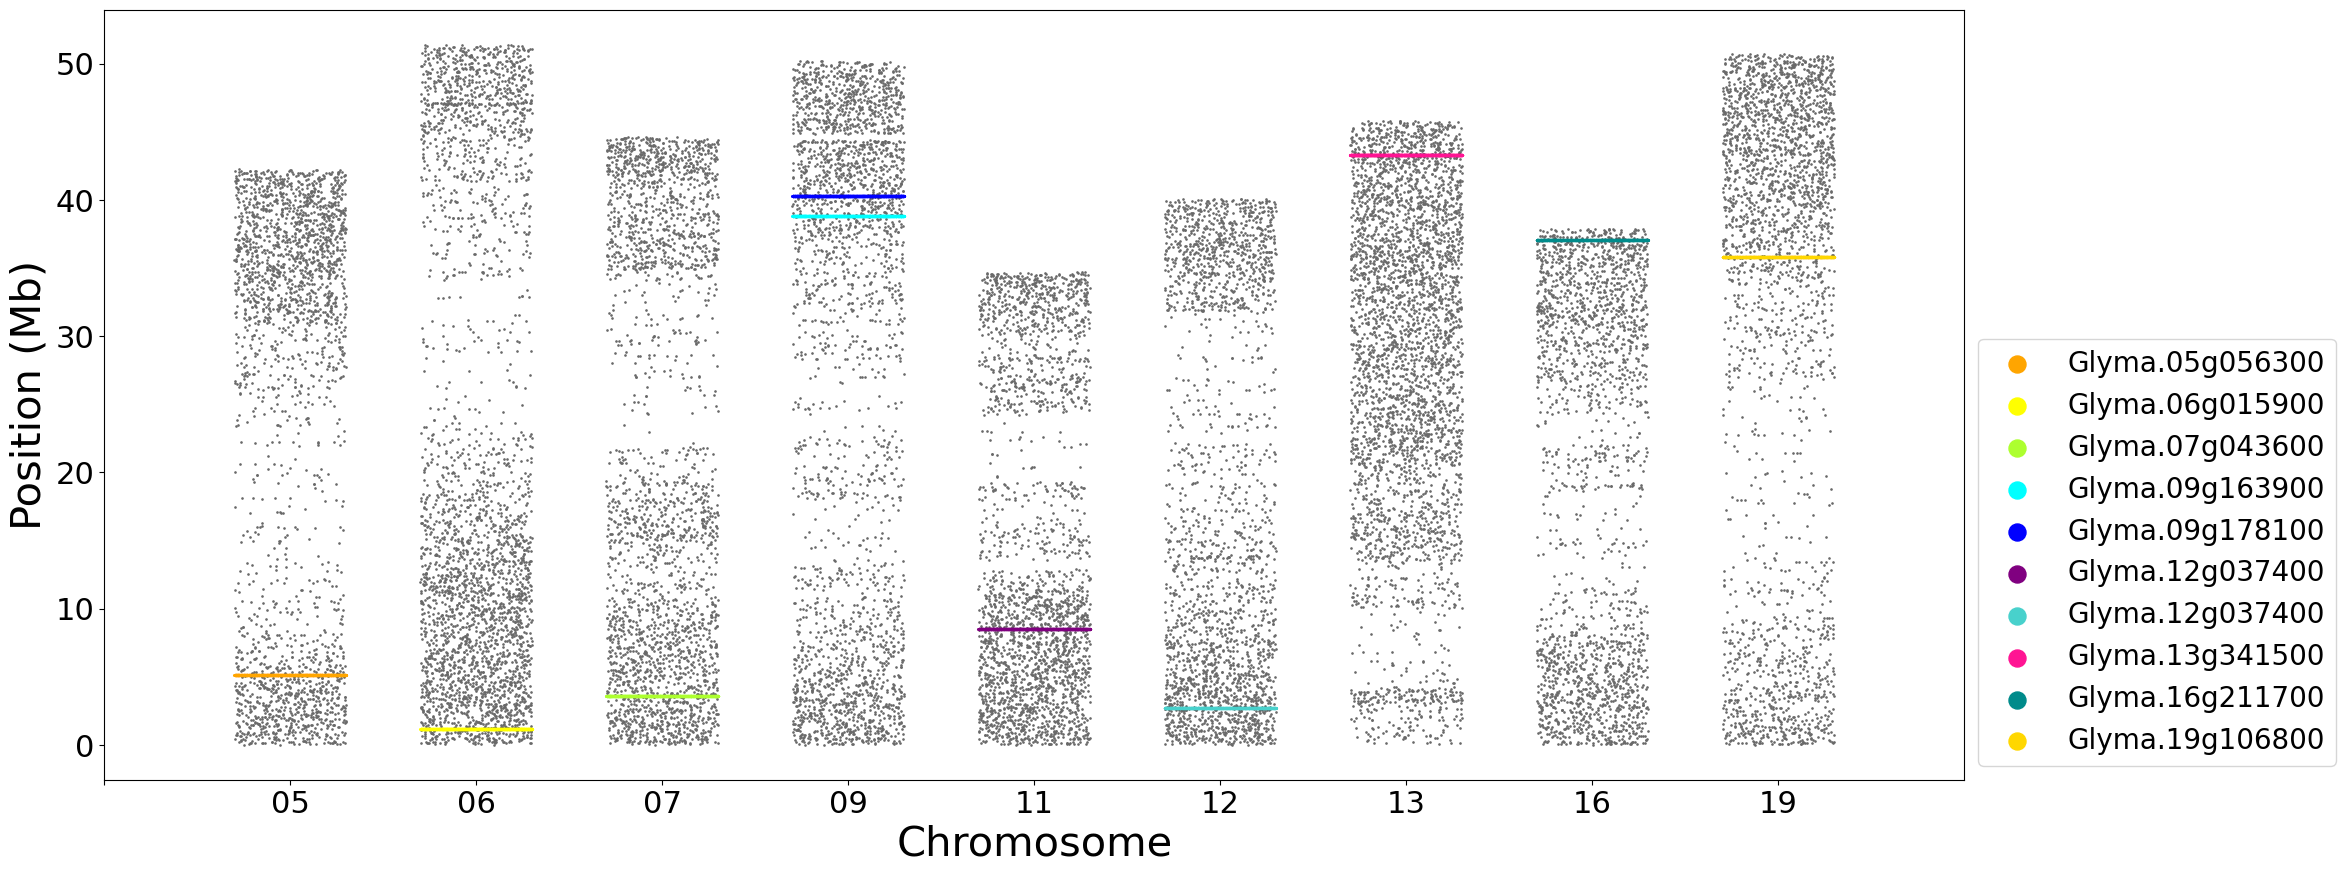

In [14]:
plt.figure(figsize = (24, 10))
dotsize = 0.8
# plot chromosome which key genes locate on
# plt.scatter(x = x_chr1, y = gene_pos[gene_pos['chr'] == 1].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr5, y = gene_pos[gene_pos['chr'] == 5].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr6, y = gene_pos[gene_pos['chr'] == 6].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr7, y = gene_pos[gene_pos['chr'] == 7].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr9, y = gene_pos[gene_pos['chr'] == 9].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr11, y = gene_pos[gene_pos['chr'] == 11].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr12, y = gene_pos[gene_pos['chr'] == 12].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr13, y = gene_pos[gene_pos['chr'] == 13].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr16, y = gene_pos[gene_pos['chr'] == 16].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')
plt.scatter(x = x_chr19, y = gene_pos[gene_pos['chr'] == 19].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'dimgrey')

# plot key genes position
dotsize = 1.5
# plt.scatter(x = x_chr1, y = chr1_key, marker = 'o', s = dotsize, color = 'red', label = key_genes[0])
plt.scatter(x = x_chr5, y = chr5_key, marker = 'o', s = dotsize, color = 'orange', label = key_genes[1 - 1])
plt.scatter(x = x_chr6, y = chr6_key, marker = 'o', s = dotsize, color = 'yellow', label = key_genes[2 - 1])
plt.scatter(x = x_chr7, y = chr7_key, marker = 'o', s = dotsize, color = 'greenyellow', label = key_genes[3 - 1])
plt.scatter(x = x_chr9, y = chr9_key, marker = 'o', s = dotsize, color = 'cyan', label = key_genes[4 - 1])
plt.scatter(x = x_chr9, y = chr9_key2, marker = 'o', s = dotsize, color = 'blue', label = key_genes[5 - 1])
plt.scatter(x = x_chr11, y = chr11_key, marker = 'o', s = dotsize, color = 'purple', label = key_genes[6])
plt.scatter(x = x_chr12, y = chr12_key, marker = 'o', s = dotsize, color = 'mediumturquoise', label = key_genes[7 - 1])
plt.scatter(x = x_chr13, y = chr13_key, marker = 'o', s = dotsize, color = 'deeppink', label = key_genes[8 - 1])
plt.scatter(x = x_chr16, y = chr16_key, marker = 'o', s = dotsize, color = 'darkcyan', label = key_genes[9 - 1])
plt.scatter(x = x_chr19, y = chr19_key, marker = 'o', s = dotsize, color = 'gold', label = key_genes[10 - 1])
plt.xlim(0, 11)

# new_xlabels = ['', '01', '05', '06', '07', '09', '11', '12', '13', '16', '19']
new_xlabels = ['', '05', '06', '07', '09', '11', '12', '13', '16', '19']
plt.xlabel('Chromosome', fontsize = 30)
plt.ylabel('Position (Mb)', fontsize = 30)
plt.xticks(range(1, 11), new_xlabels, fontsize = 22)
plt.xlim(1, 11)
plt.yticks(fontsize = 22)
plt.legend(loc = 'lower left', bbox_to_anchor = (1, 0), fontsize = 20, markerscale = 10)
plt.show()

In [15]:
df_startend = pd.DataFrame()
gm = []
start_pos = []
end_pos = []
ttl_genes = []
for chr_n in range(1, 21):
    df_chr = gene_pos[gene_pos['chr'] == chr_n].reset_index()
    start = df_chr['bp0_mb'][0]
    end = df_chr['bp1_mb'][len(df_chr['gene']) - 1]
    ttl_gene = len(df_chr)
    gm.append(chr_n)
    start_pos.append(start)
    end_pos.append(end)
    ttl_genes.append(ttl_gene)
df_startend['Gm'] = gm
df_startend['start'] = start_pos
df_startend['end'] = end_pos
df_startend['ttl_genes'] = ttl_genes

In [16]:
gene_pos[gene_pos['gene'].isin(key_genes)].reset_index()

index             gene  chr       bp0       bp1     bp0_mb     bp1_mb  \
0  11365  Glyma.05g056300    5   5148962   5154038   5.148962   5.154038   
1  13452  Glyma.06g015900    6   1187405   1190649   1.187405   1.190649   
2  16987  Glyma.07g043600    7   3614217   3615260   3.614217   3.615260   
3  24612  Glyma.09g163900    9  38821800  38822829  38.821800  38.822829   
4  24754  Glyma.09g178100    9  40288436  40293420  40.288436  40.293420   
5  29941  Glyma.11g111400   11   8496826   8499771   8.496826   8.499771   
6  31771  Glyma.12g037400   12   2709372   2712325   2.709372   2.712325   
7  37237  Glyma.13g341500   13  43324927  43327135  43.324927  43.327135   
8  44688  Glyma.16g211700   16  37046677  37047788  37.046677  37.047788   
9  51512  Glyma.19g106800   19  35815835  35818684  35.815835  35.818684   

       bp_avg   bpavg_mb  
0   5151500.0   5.151500  
1   1189027.0   1.189027  
2   3614738.5   3.614739  
3  38822314.5  38.822314  
4  40290928.0  40.290928  
5   8498298.5   8.498299  
6   2710848.5   2.710848  
7  43326031.0  43.326031  
8  37047232.5  37.047232  
9  35817259.5  35.817259

In [17]:
df_dtoverlap = gene_pos[gene_pos['gene'].isin(overlap_dtgenes)].reset_index()
df_dtoverlap.head()

index             gene  chr       bp0       bp1     bp0_mb     bp1_mb  \
0   1246  Glyma.01g124700    1  43008183  43010029  43.008183  43.010029   
1   2257  Glyma.01g225800    1  55452581  55456886  55.452581  55.456886   
2   3938  Glyma.02g148200    2  15285617  15287292  15.285617  15.287292   
3   4958  Glyma.02g250200    2  43779470  43781548  43.779470  43.781548   
4   5613  Glyma.03g003400    3    313242    317840   0.313242   0.317840   

       bp_avg   bpavg_mb  
0  43009106.0  43.009106  
1  55454733.5  55.454734  
2  15286454.5  15.286454  
3  43780509.0  43.780509  
4    315541.0   0.315541

DNA

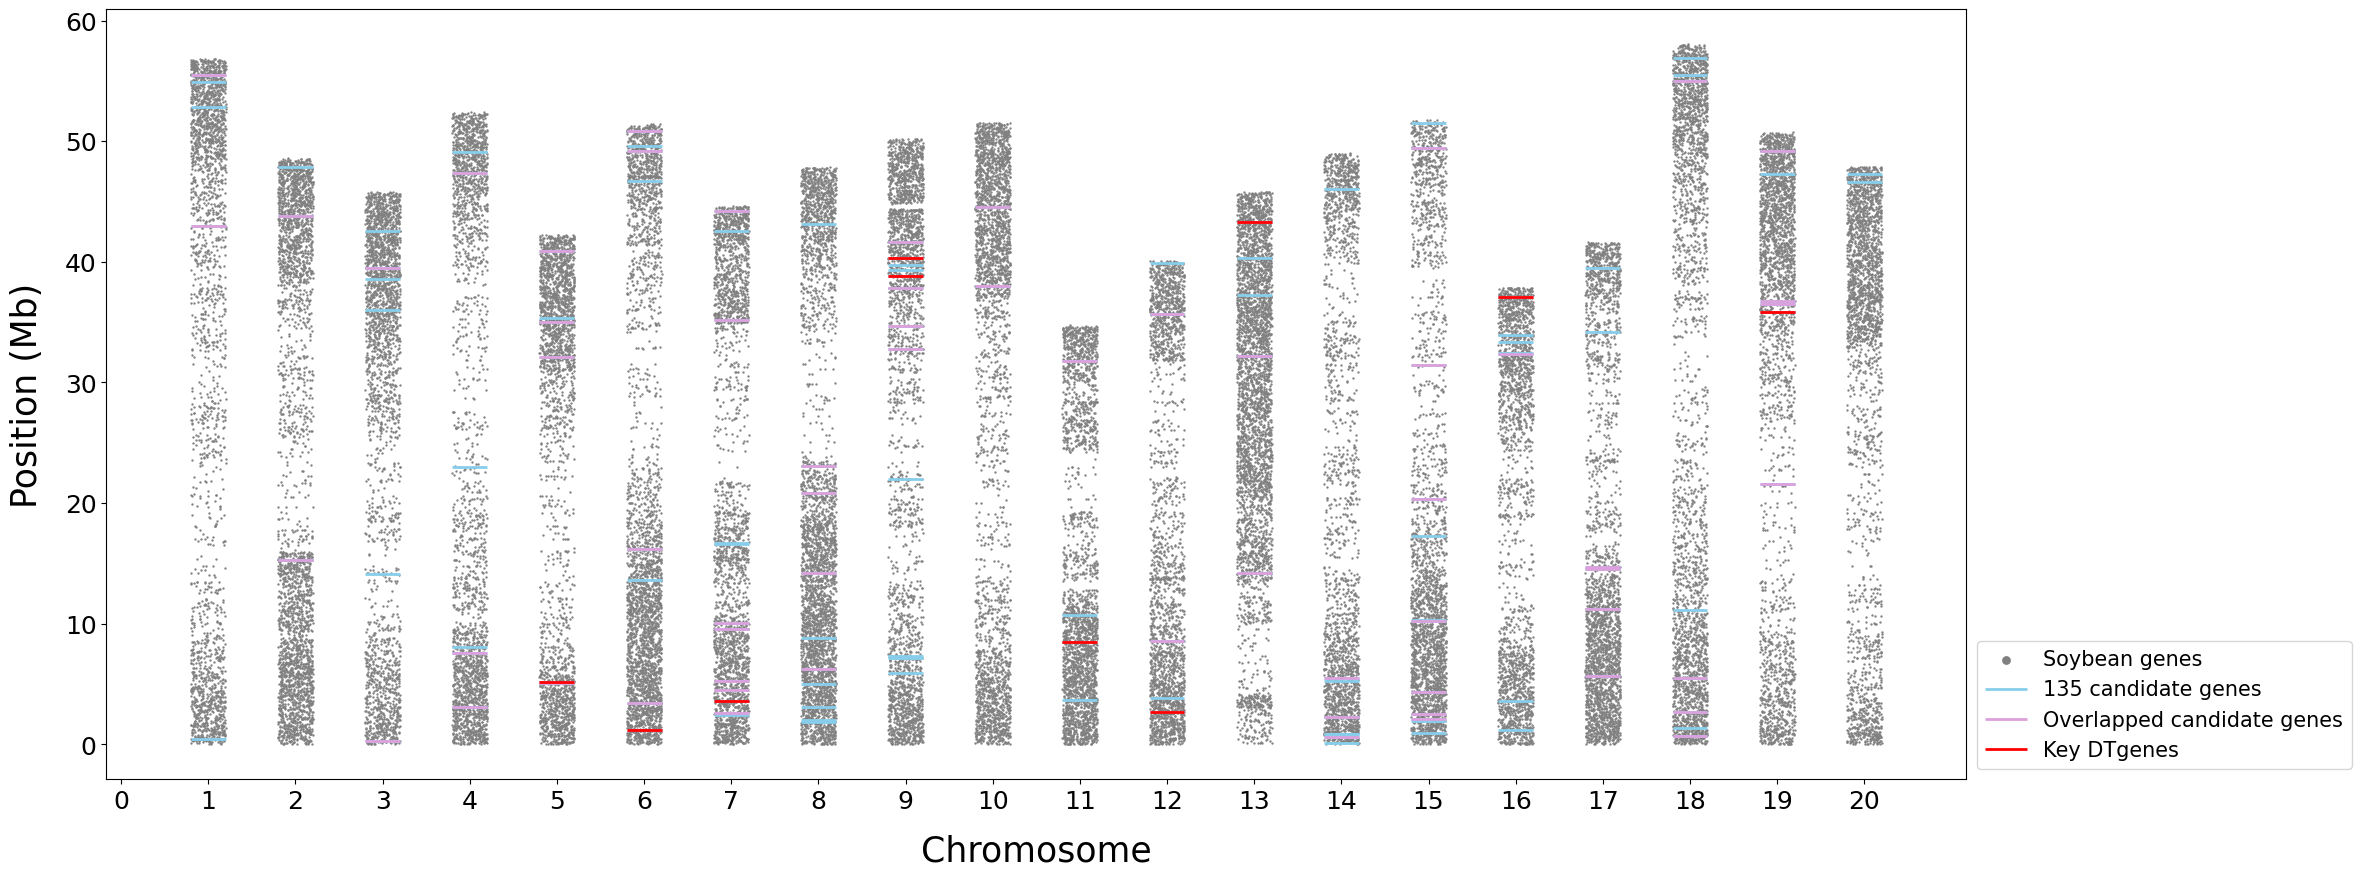

In [19]:
fig, ax = plt.subplots(figsize = (24, 10))

# plotting all genes in chr
pos = 0.5
dotsize = 0.5
for chr_n in range(1, 21):
    df_pos = df_startend[df_startend['Gm'] == chr_n].reset_index()
    x_cover = np.random.uniform(low = pos - 0.1, high = pos + 0.1, size = df_pos['ttl_genes'][0])
    ax.scatter(x = x_cover, y = gene_pos[gene_pos['chr'] == chr_n].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'grey', label = 'Soybean genes')
    pos += 0.5

# plot DNA DTgenes
df_dnadtgenes = gene_pos[gene_pos['gene'].isin(dna_dtgenes)].reset_index().drop(['index'], axis = 1)
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    df_dtdnapos = df_dnadtgenes[df_dnadtgenes['chr'] == chr_n].reset_index()
    # x_cover = np.random.uniform(low = pos - 0.15, high = pos + 0.15, size = len(df_dtdnapos['gene']))
    # plt.scatter(x = x_cover, y = df_dtdnapos['bpavg_mb'], marker = 'o', color = 'blue', s = dotsize)
    for gene_n in range(len(df_dtdnapos['gene'])):
        ax.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtdnapos['bpavg_mb'][gene_n], linewidth = 2, color = 'skyblue', label = '135 candidate genes')
    pos += 0.5

# plot genes overlapped with RNA DTgenes
df_dtoverlap = gene_pos[gene_pos['gene'].isin(overlap_dtgenes)].reset_index().drop(['index'], axis = 1)
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    df_dtoverlap_pos = df_dtoverlap[df_dtoverlap['chr'] == chr_n].reset_index()
    for gene_n in range(len(df_dtoverlap_pos)):
        ax.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtoverlap_pos['bpavg_mb'][gene_n], linewidth = 2, color = 'plum', label = 'Overlapped candidate genes')
    pos += 0.5

    
# plot 11 DTgenes
df_dtgenes = gene_pos[gene_pos['gene'].isin(key_genes)].reset_index()
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    if df_dtgenes[df_dtgenes['chr'] == chr_n].empty:
        pos += 0.5
    elif len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene']) == 1:
        plt.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtgenes[df_dtgenes['chr'] == chr_n].reset_index()['bpavg_mb'][0], linewidth = 2, color = 'red', label = 'Key DTgenes')
        pos += 0.5
    elif len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene']) > 1:
        for gene_n in range(len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene'])):
            plt.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtgenes[df_dtgenes['chr'] == chr_n].reset_index()['bpavg_mb'][gene_n], linewidth = 2, color = 'red', label = 'Key DTgenes')
        pos += 0.5

new_xlabel = [str(i) for i in range(0, 21)]
plt.xticks(np.arange(0, 10.5, 0.5), new_xlabel,fontsize = 18)
plt.xlabel('Chromosome', fontsize = 25, labelpad = 15)
plt.yticks(fontsize = 18)
plt.ylabel('Position (Mb)', fontsize = 25, labelpad = 15)

# ax.legend(fontsize = 20, loc = 'lower left')
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize = 15, loc = 'lower left', bbox_to_anchor = (1, 0), markerscale = 7.5)
legend_without_duplicate_labels(ax)
# plt.savefig(r'C:\Users\edwar\Desktop\農藝\paper2\raw_figures\DNA DTgenes position.jpg', dpi = 400, bbox_inches='tight')
plt.savefig(r'C:\Users\edwar\Desktop\農藝\paper2\raw_figures\DNA DTgenes position v1.jpg', dpi = 400, bbox_inches='tight')
# plt.show()

RNA

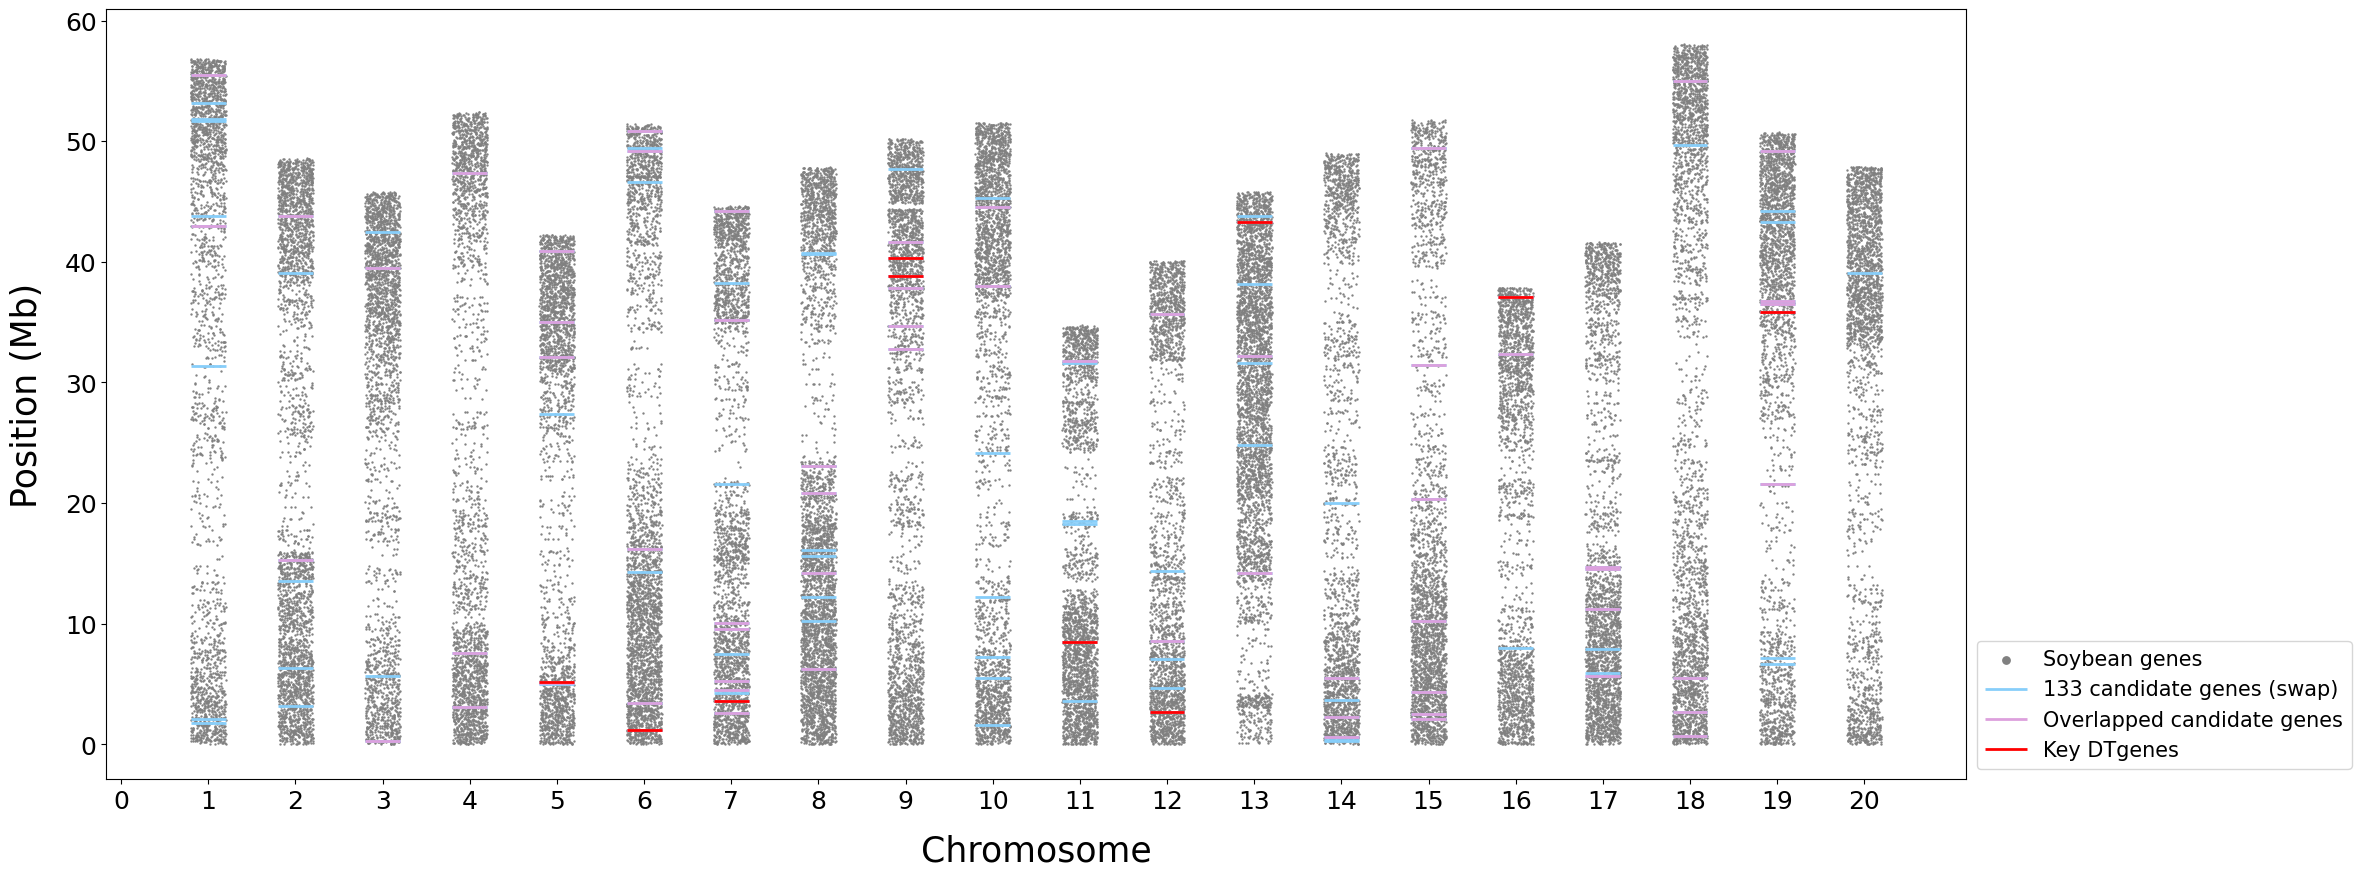

In [21]:
fig, ax = plt.subplots(figsize = (24, 10))

# plotting all genes in chr
pos = 0.5
dotsize = 0.5
for chr_n in range(1, 21):
    df_pos = df_startend[df_startend['Gm'] == chr_n].reset_index()
    x_cover = np.random.uniform(low = pos - 0.1, high = pos + 0.1, size = df_pos['ttl_genes'][0])
    ax.scatter(x = x_cover, y = gene_pos[gene_pos['chr'] == chr_n].reset_index()['bpavg_mb'], marker = 'o', s = dotsize, color = 'grey', label = 'Soybean genes')
    pos += 0.5

# plot RNA DTgenes
df_rnadtgenes = gene_pos[gene_pos['gene'].isin(rna_dtgenes)].reset_index().drop(['index'], axis = 1)
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    df_dtrnapos = df_rnadtgenes[df_rnadtgenes['chr'] == chr_n].reset_index()
    for gene_n in range(len(df_dtrnapos['gene'])):
        ax.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtrnapos['bpavg_mb'][gene_n], linewidth = 2, color = 'lightskyblue', label = '133 candidate genes (swap)')
    pos += 0.5

# plot genes overlapped with RNA DTgenes
df_dtoverlap = gene_pos[gene_pos['gene'].isin(overlap_dtgenes)].reset_index().drop(['index'], axis = 1)
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    df_dtoverlap_pos = df_dtoverlap[df_dtoverlap['chr'] == chr_n].reset_index()
    for gene_n in range(len(df_dtoverlap_pos)):
        ax.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtoverlap_pos['bpavg_mb'][gene_n], linewidth = 2, color = 'plum', label = 'Overlapped candidate genes')
    pos += 0.5

    
# plot 11 DTgenes
df_dtgenes = gene_pos[gene_pos['gene'].isin(key_genes)].reset_index()
pos = 0.5
dotsize = 20
for chr_n in range(1, 21):
    if df_dtgenes[df_dtgenes['chr'] == chr_n].empty:
        pos += 0.5
    elif len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene']) == 1:
        plt.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtgenes[df_dtgenes['chr'] == chr_n].reset_index()['bpavg_mb'][0], linewidth = 2, color = 'red', label = 'Key DTgenes')
        pos += 0.5
    elif len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene']) > 1:
        for gene_n in range(len(df_dtgenes[df_dtgenes['chr'] == chr_n]['gene'])):
            plt.hlines(xmin = pos - 0.1, xmax = pos + 0.1, y = df_dtgenes[df_dtgenes['chr'] == chr_n].reset_index()['bpavg_mb'][gene_n], linewidth = 2, color = 'red', label = 'Key DTgenes')
        pos += 0.5

new_xlabel = [str(i) for i in range(0, 21)]
plt.xticks(np.arange(0, 10.5, 0.5), new_xlabel,fontsize = 18)
plt.xlabel('Chromosome', fontsize = 25, labelpad = 15)
plt.yticks(fontsize = 18)
plt.ylabel('Position (Mb)', fontsize = 25, labelpad = 15)

# ax.legend(fontsize = 20, loc = 'lower left')
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize = 15, loc = 'lower left', bbox_to_anchor = (1, 0), markerscale = 7.5)
legend_without_duplicate_labels(ax)
# plt.savefig(r'C:\Users\edwar\Desktop\農藝\paper2\raw_figures\RNA DTgenes position.jpg', dpi = 400, bbox_inches='tight')
plt.savefig(r'C:\Users\edwar\Desktop\農藝\paper2\raw_figures\RNA DTgenes position v1.jpg', dpi = 400, bbox_inches='tight')
# plt.show()

In [170]:
df_dtgenes

index             gene  chr       bp0       bp1     bp0_mb     bp1_mb  \
0    1246  Glyma.01g124700    1  43008183  43010029  43.008183  43.010029   
1   11365  Glyma.05g056300    5   5148962   5154038   5.148962   5.154038   
2   13452  Glyma.06g015900    6   1187405   1190649   1.187405   1.190649   
3   16987  Glyma.07g043600    7   3614217   3615260   3.614217   3.615260   
4   24612  Glyma.09g163900    9  38821800  38822829  38.821800  38.822829   
5   24754  Glyma.09g178100    9  40288436  40293420  40.288436  40.293420   
6   29941  Glyma.11g111400   11   8496826   8499771   8.496826   8.499771   
7   31771  Glyma.12g037400   12   2709372   2712325   2.709372   2.712325   
8   37237  Glyma.13g341500   13  43324927  43327135  43.324927  43.327135   
9   44688  Glyma.16g211700   16  37046677  37047788  37.046677  37.047788   
10  51512  Glyma.19g106800   19  35815835  35818684  35.815835  35.818684   

        bp_avg   bpavg_mb  
0   43009106.0  43.009106  
1    5151500.0   5.151500  
2    1189027.0   1.189027  
3    3614738.5   3.614739  
4   38822314.5  38.822314  
5   40290928.0  40.290928  
6    8498298.5   8.498299  
7    2710848.5   2.710848  
8   43326031.0  43.326031  
9   37047232.5  37.047232  
10  35817259.5  35.817259

In [155]:
df_dtgenes = gene_pos[gene_pos['gene'].isin(key_genes)].reset_index()
df_dtgenes[df_dtgenes['chr'] == 1].empty

False

In [156]:
df_dtgenes.head()

index             gene  chr       bp0       bp1     bp0_mb     bp1_mb  \
0   1246  Glyma.01g124700    1  43008183  43010029  43.008183  43.010029   
1  11365  Glyma.05g056300    5   5148962   5154038   5.148962   5.154038   
2  13452  Glyma.06g015900    6   1187405   1190649   1.187405   1.190649   
3  16987  Glyma.07g043600    7   3614217   3615260   3.614217   3.615260   
4  24612  Glyma.09g163900    9  38821800  38822829  38.821800  38.822829   

       bp_avg   bpavg_mb  
0  43009106.0  43.009106  
1   5151500.0   5.151500  
2   1189027.0   1.189027  
3   3614738.5   3.614739  
4  38822314.5  38.822314

In [158]:
df_dtgenes[df_dtgenes['chr'] == 1].reset_index()

level_0  index             gene  chr       bp0       bp1     bp0_mb  \
0        0   1246  Glyma.01g124700    1  43008183  43010029  43.008183   

      bp1_mb      bp_avg   bpavg_mb  
0  43.010029  43009106.0  43.009106

In [160]:
df_dtgenes[df_dtgenes['chr'] == 1].reset_index()['bpavg_mb'][0]

43.009106

In [48]:
dna_dt[dna_dt['gene'].isin(key_genes)].reset_index().drop(['index'], axis = 1).to_csv(r'C:\Users\edwar\Desktop\農藝\paper2\key_genes_inf.csv', index = False)

### Data collection figs

In [154]:
s_num = 200
x_gene = np.random.uniform(low = 0.3, high = 0.7, size = s_num)
y_ax = np.random.uniform(low = 1, high = 5, size = s_num)
x_tran = np.random.uniform(low = 0.7, high = 1.1, size = s_num)
x_pro = np.random.uniform(low = 1.1, high = 1.5, size = s_num)
x_met = np.random.uniform(low = 1.5, high = 1.9, size = s_num)
x_epi = np.random.uniform(low = 1.9, high = 2.3, size = s_num)

In [202]:
len

array([ 2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,
        4.2,  4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,
        6.4,  6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,
        8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,
       10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8,
       13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. ,
       15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2,
       17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4,
       19.6, 19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6,
       21.8, 22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8,
       24. , 24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. ,
       26.2, 26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2,
       28.4, 28.6, 28.8, 29. , 29.2, 29.4, 29.6, 29.8])

last step pics

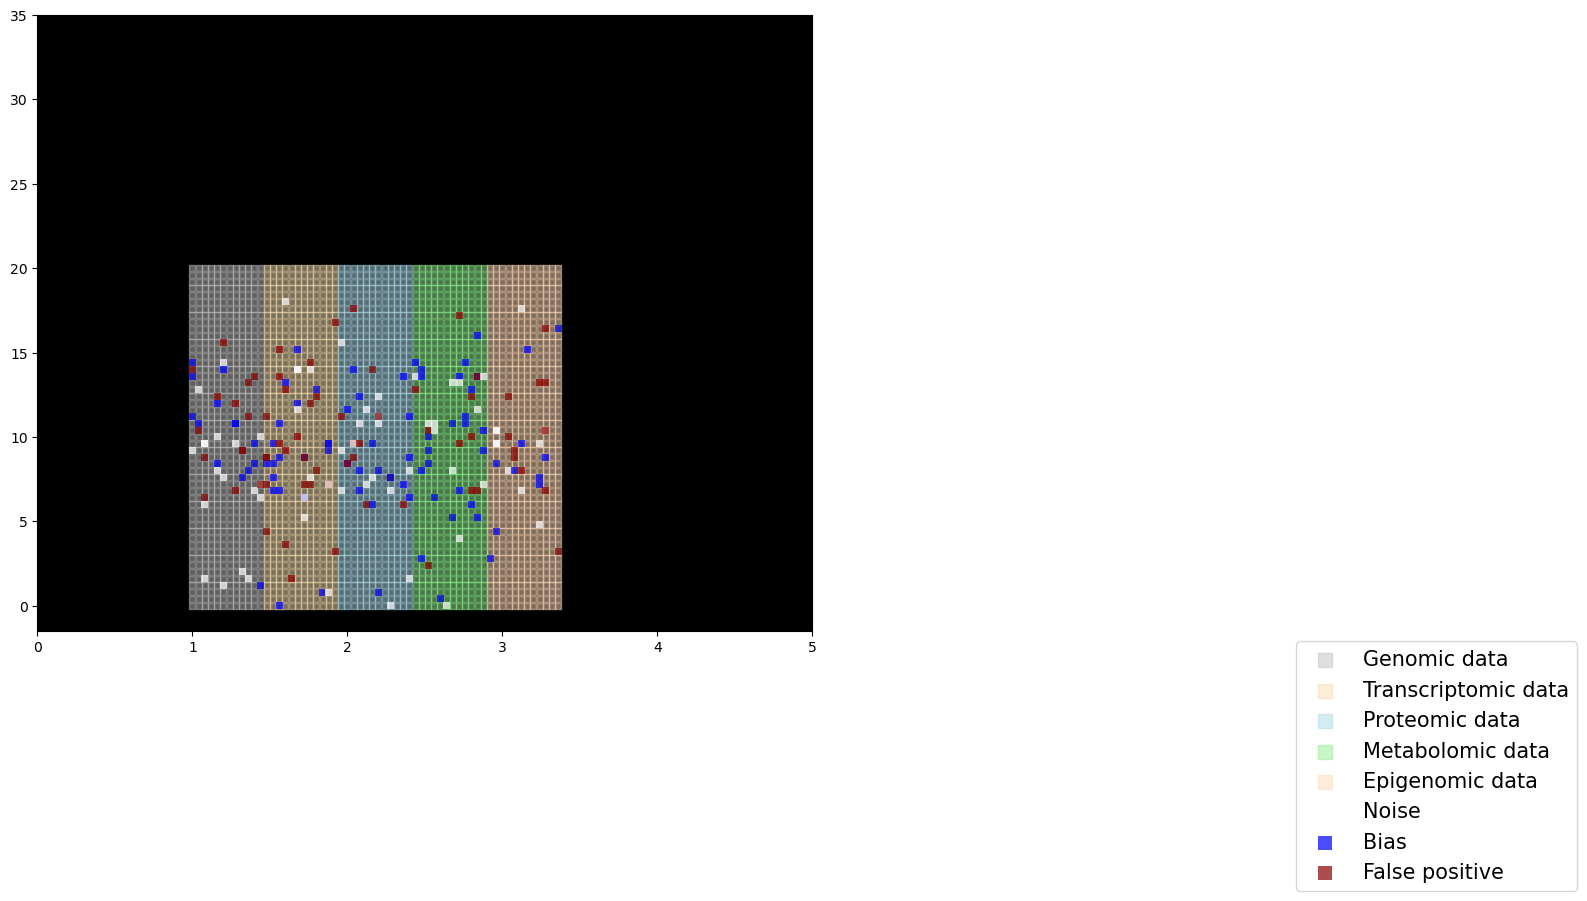

In [5]:
dotsize = 25
# plt.figure(figsize = (10, 8))
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('black')
plt.xlim(0, 5)
plt.ylim(-1.5, 35)
geno_list = [i for i in np.arange(0, 20.4, 0.4)]
pos = 1
for i in range(12):
    plt.scatter(x = [pos for i in range(len(geno_list))], y = geno_list, color = 'silver', marker = 's', s = dotsize, alpha = 0.5, linewidths = 1, label = 'Genomic data')
    pos += 0.04

for i in range(12):
    plt.scatter(x = [pos for i in range(len(geno_list))], y = geno_list, color = 'wheat', marker = 's', s = dotsize, alpha = 0.5, linewidths = 1, label = 'Transcriptomic data')
    pos += 0.04
    
for i in range(12):
    plt.scatter(x = [pos for i in range(len(geno_list))], y = geno_list, color = 'lightblue', marker = 's', s = dotsize, alpha = 0.5, linewidths = 1, label = 'Proteomic data')
    pos += 0.04

for i in range(12):
    plt.scatter(x = [pos for i in range(len(geno_list))], y = geno_list, color = 'lightgreen', marker = 's', s = dotsize, alpha = 0.5, linewidths = 1, label = 'Metabolomic data')
    pos += 0.04

for i in range(12):
    plt.scatter(x = [pos for i in range(len(geno_list))], y = geno_list, color = 'peachpuff', marker = 's', s = dotsize, alpha = 0.5, linewidths = 1, label = 'Epigenomic data')
    pos += 0.04
    
# y軸分成 0~4, 4~, 8~10
zero_four = geno_list[:14]
four_thirty = geno_list[15:37]
remain = geno_list[38:46]
error_colors = ['darkred', 'blue', 'white']
pos_all = np.arange(1, 3.4, 0.04)
# pos_1 = 1

for xa in pos_all:
    ns = [0, 1]
    for i in range(np.random.choice(ns)):
        sampled_val = np.random.choice(zero_four)
        plt.scatter(x = [xa], y = [sampled_val], color = np.random.choice(error_colors), marker = 's', s = dotsize, alpha = 0.7, edgecolor = 'none', label = 'Noise')

for xa in pos_all:
    ns = [0, 3, 4, 5]
    for i in range(np.random.choice(ns)):
        sampled_val = np.random.choice(four_thirty)
        plt.scatter(x = [xa], y = [sampled_val], color = np.random.choice(error_colors), marker = 's', s = dotsize, alpha = 0.7, edgecolor = 'none', label = 'Bias')

for xa in pos_all:
    ns = [0, 1, 0, 0]
    for i in range(np.random.choice(ns)):
        sampled_val = np.random.choice(remain)
        plt.scatter(x = [xa], y = [sampled_val], color = np.random.choice(error_colors), marker = 's', s = dotsize, alpha = 0.7, edgecolor = 'none', label = 'False positive')
    
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize = 15, loc = 'upper right', bbox_to_anchor = (2, 0), markerscale = 2)
legend_without_duplicate_labels(ax)
plt.show()

first step pics

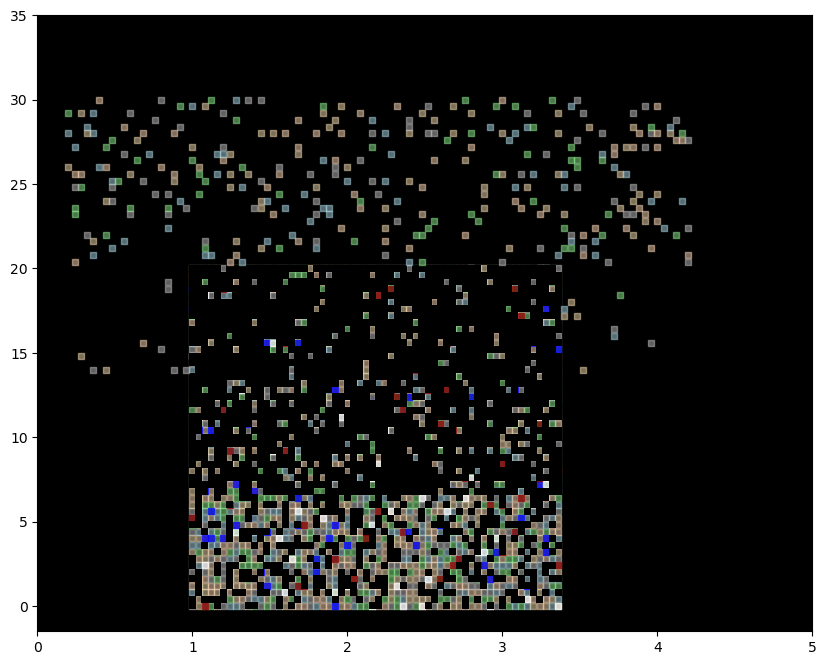

In [499]:
dotsize = 25
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('black')
plt.xlim(0, 5)
plt.ylim(-1.5, 35)
geno_list = [i for i in np.arange(0, 20.4, 0.4)]
# pos = 1
omics_colors = ['silver', 'wheat', 'lightblue', 'lightgreen', 'peachpuff']
error_colors = ['blue', 'white', 'darkred']
pos_all = np.arange(1, 3.4, 0.04)
# control omics color
for pos in pos_all:
    for j in geno_list:
        plt.scatter(x = [pos], y = [j], color = np.random.choice(omics_colors), s = dotsize, marker = 's', alpha = 0.5)

# control error color
error_chance = [1 for i in range(10)] + [0]
for pos in pos_all:
    for j in geno_list:
        if np.random.choice(error_chance) == 0:
            plt.scatter(x = [pos], y = [j], color = np.random.choice(error_colors), s = dotsize, marker = 's', alpha = 0.7)

# control black side
geno_list1 = geno_list[:17]
geno_list2 = geno_list[17:34]
geno_list3 = geno_list[34:]

for pos in pos_all:
    chance = [1 for i in range(2)] + [0]
    for j in geno_list1:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')

for pos in pos_all:
    chance = [0 for i in range(4)] + [1]
    for j in geno_list2:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')
            
for pos in pos_all:
    chance = [0 for i in range(10)] + [1]
    for j in geno_list3:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')

# control extended area
pos_extend1 = [i for i in np.arange(0.2, 1, 0.04)][::-1]
pos_extend2 = [i for i in np.arange(3.4, 4.2, 0.04)]
geno_list_extend = [i for i in np.arange(20.4, 30, 0.4)]

chance1 = [0 for i in range(10)] + [1]
for pos in pos_extend1:
    for j in geno_list3:
        if np.random.choice(chance1) == 1:
            plt.scatter(x = [pos], y = [j], color = np.random.choice(omics_colors), s = dotsize, marker = 's', alpha = 0.5)
    chance1 = chance1 + [0 for i in range(7)]

chance2 = [0 for i in range(10)] + [1]
for pos in pos_extend2:
    for j in geno_list3:
        if np.random.choice(chance2) == 1:
            plt.scatter(x = [pos], y = [j], color = np.random.choice(omics_colors), s = dotsize, marker = 's', alpha = 0.5)
    chance2 = chance2 + [0 for i in range(7)]

for pos in pos_extend1 + list(pos_all) + pos_extend2:
    chance = [0 for i in range(7)] + [1]
    for j in geno_list_extend:
        if np.random.choice(chance) == 1:
            plt.scatter(x = [pos], y = [j], color = np.random.choice(omics_colors), s = dotsize, marker = 's', alpha = 0.5)

plt.show()

second step pics

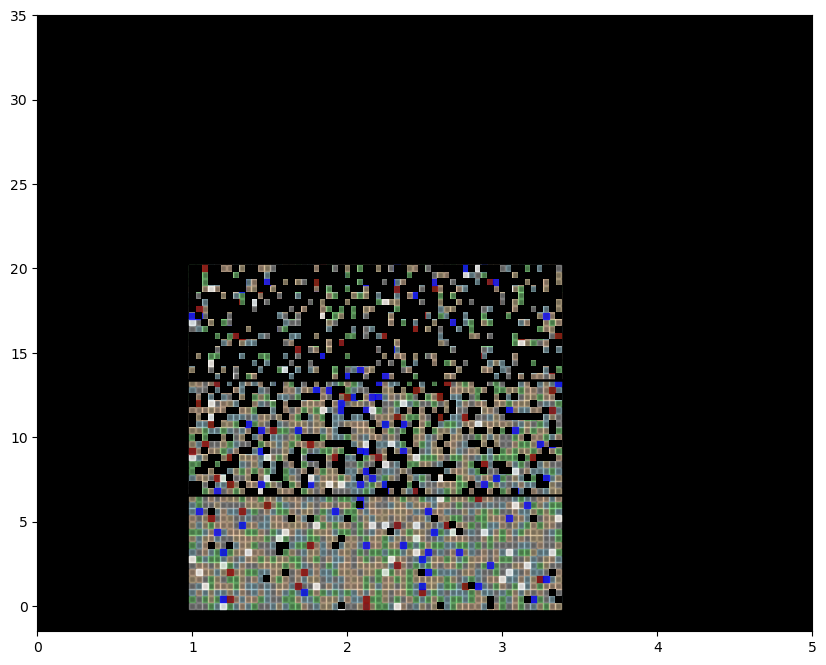

In [481]:
dotsize = 25
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('black')
plt.xlim(0, 5)
plt.ylim(-1.5, 35)
geno_list = [i for i in np.arange(0, 20.4, 0.4)]
# pos = 1
omics_colors = ['silver', 'wheat', 'lightblue', 'lightgreen', 'peachpuff']
error_colors = ['blue', 'white', 'darkred']
pos_all = np.arange(1, 3.4, 0.04)
# control omics color
for pos in pos_all:
    for j in geno_list:
        plt.scatter(x = [pos], y = [j], color = np.random.choice(omics_colors), s = dotsize, marker = 's', alpha = 0.5)

# control error color
error_chance = [1 for i in range(10)] + [0]
for pos in pos_all:
    for j in geno_list:
        if np.random.choice(error_chance) == 0:
            plt.scatter(x = [pos], y = [j], color = np.random.choice(error_colors), s = dotsize, marker = 's', alpha = 0.7)

# control black side
geno_list1 = geno_list[:17]
geno_list2 = geno_list[17:34]
geno_list3 = geno_list[34:]

for pos in pos_all:
    chance = [1 for i in range(40)] + [0]
    for j in geno_list1:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')

for pos in pos_all:
    chance = [1 for i in range(3)] + [0]
    for j in geno_list2:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')
            
for pos in pos_all:
    chance = [0 for i in range(2)] + [1]
    for j in geno_list3:
        if np.random.choice(chance) == 0:
            plt.scatter(x = [pos], y = [j], color = 'black', s = dotsize, marker = 's', linewidths = 0.1, edgecolor = 'none')

plt.axhline(y = 6.6, linewidth = 1.8, color = 'black')
plt.axhline(y = 13.4, linewidth = 1.8, color = 'black')
plt.show()

In [466]:
np.array([0, 1, 2]) + np.array([1, 1, 1])

array([1, 2, 3])

In [440]:
[i for i in np.arange(0.2, 1, 0.04)][::-1]

[0.9600000000000002,
 0.9200000000000002,
 0.8800000000000001,
 0.8400000000000001,
 0.8,
 0.76,
 0.7200000000000002,
 0.6800000000000002,
 0.6400000000000001,
 0.6000000000000001,
 0.56,
 0.52,
 0.48000000000000004,
 0.44000000000000006,
 0.4,
 0.36000000000000004,
 0.32000000000000006,
 0.28,
 0.24000000000000002,
 0.2]

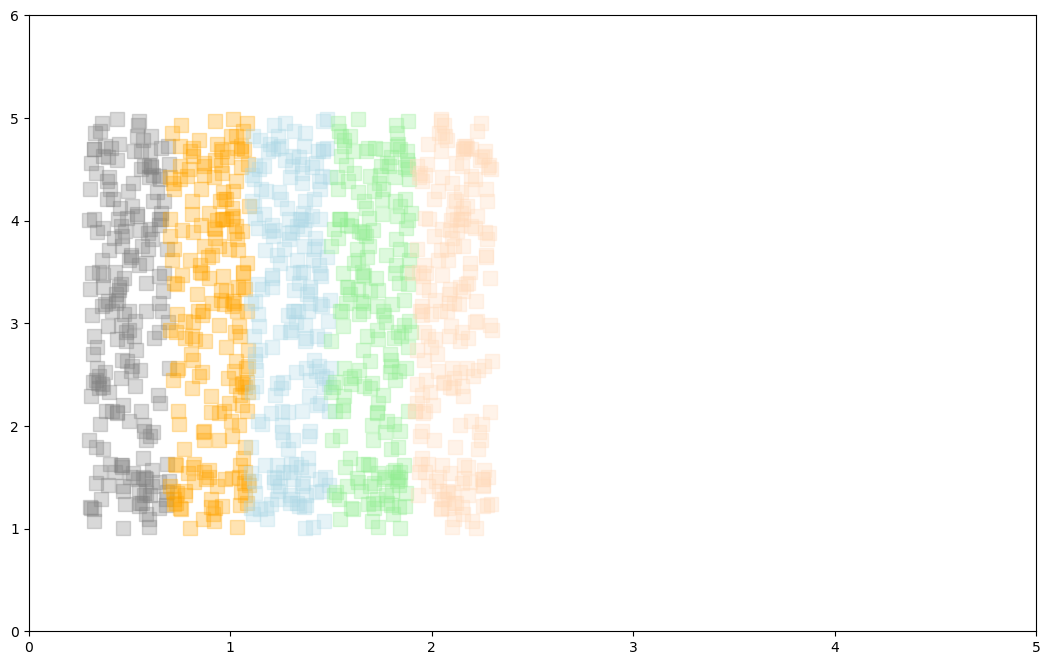

In [157]:
plt.figure(figsize = (13, 8))
dotsize = 100
# y_ax = 
plt.scatter(x = x_gene, y = y_ax, color = 'grey', marker = 's', s = dotsize, alpha = 0.3)
plt.scatter(x = x_tran, y = y_ax, color = 'orange', marker = 's', s = dotsize, alpha = 0.3)
plt.scatter(x = x_pro, y = y_ax, color = 'lightblue', marker = 's', s = dotsize, alpha = 0.3)
plt.scatter(x = x_met, y = y_ax, color = 'lightgreen', marker = 's', s = dotsize, alpha = 0.3)
plt.scatter(x = x_epi, y = y_ax, color = 'peachpuff', marker = 's', s = dotsize, alpha = 0.3)

plt.xlim(0, 5)
plt.ylim(0, 6)
plt.show()

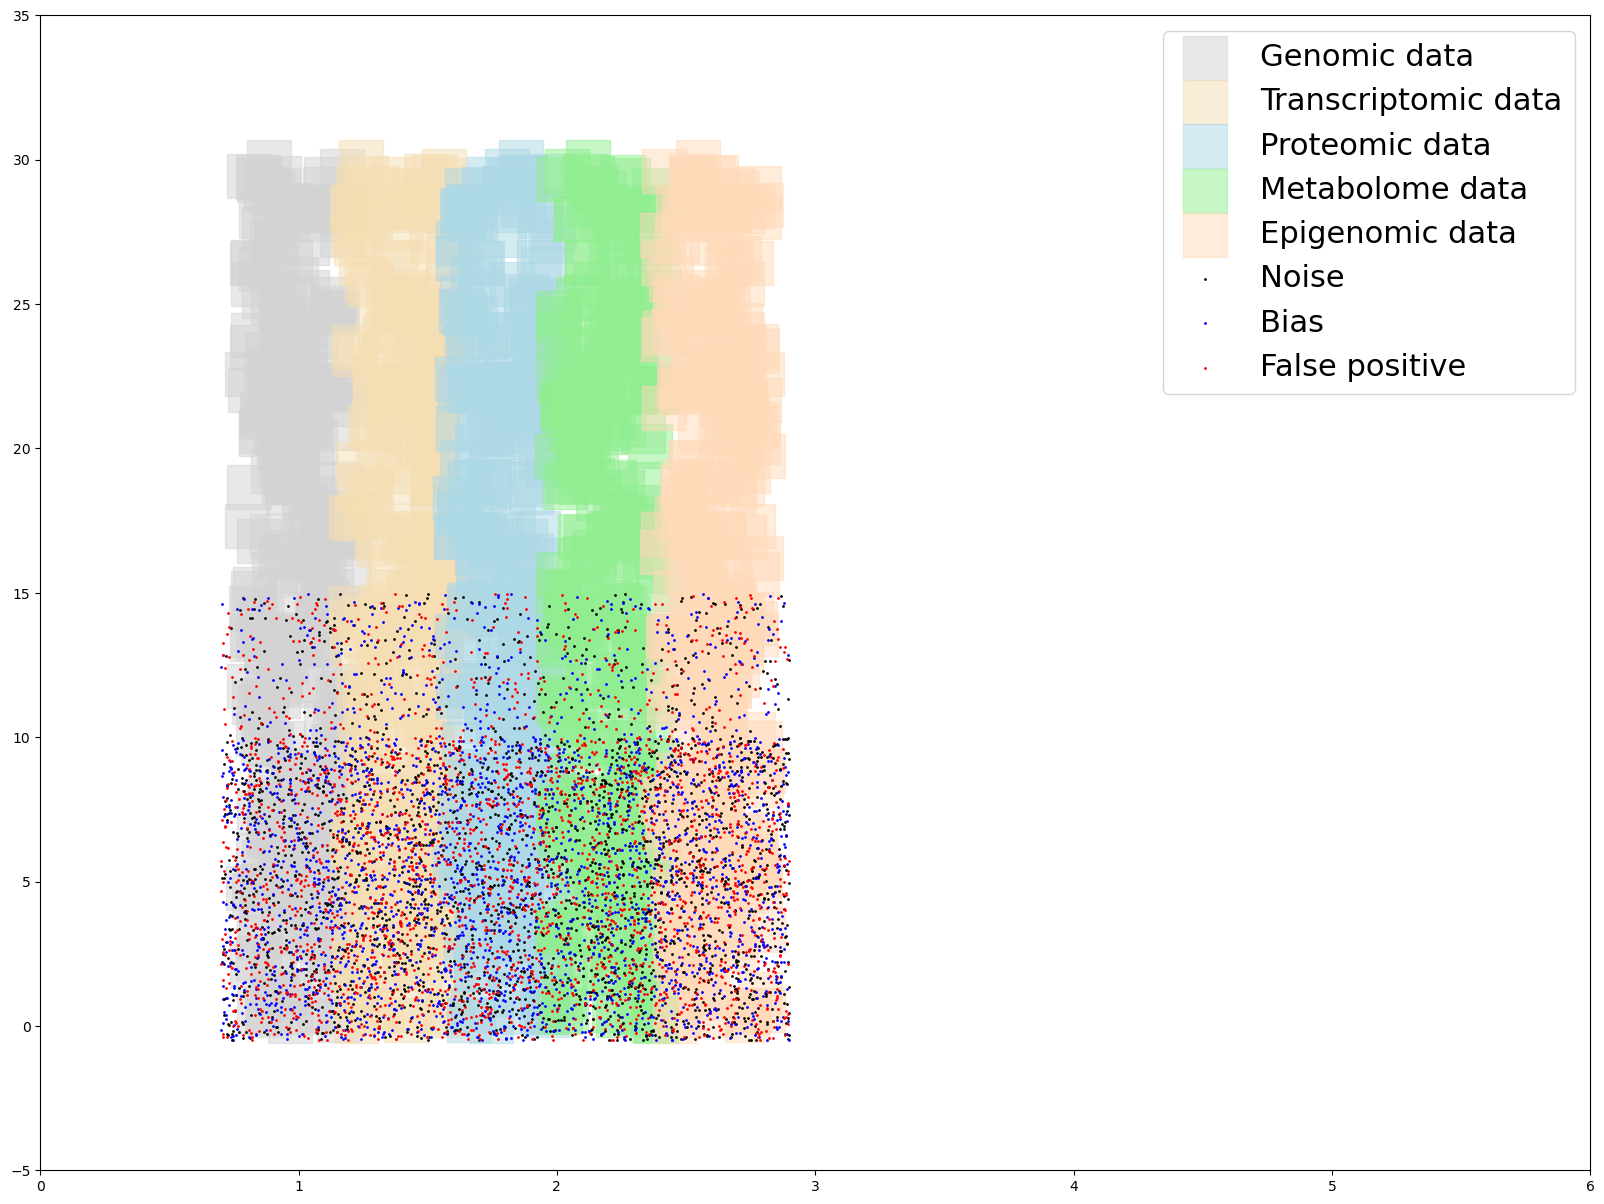

In [153]:
plt.figure(figsize = (20, 15))
dotsize, s_num = 1000, 250
pos1, pos2 = 0.8, 1.2
y_ax = np.random.uniform(low = 0, high = 30, size = s_num)
colors = ['lightgrey', 'wheat', 'lightblue', 'lightgreen', 'peachpuff']
labels = ['Genomic data', 'Transcriptomic data', 'Proteomic data', 'Metabolome data', 'Epigenomic data']
plt.xlim(0, 6)
plt.ylim(-5, 35)
for i in range(5):
    x_ax = np.random.uniform(low = pos1, high = pos2, size = s_num)
    plt.scatter(x = x_ax, y = y_ax, marker = 's', s = dotsize, alpha = 0.5, color = colors[i], label = labels[i])
    pos1 += 0.4
    pos2 += 0.4

low_pos, high_pos = 0.7, 2.9
y_errors_main = np.random.uniform(low = -0.5, high = 10, size = 1500)
x_noise_main = np.random.uniform(low = low_pos, high = high_pos, size = 1500)
x_bias_main = np.random.uniform(low = low_pos, high = high_pos, size = 1500)
x_fp_main = np.random.uniform(low = low_pos, high = high_pos, size = 1500)

y_errors_second = np.random.uniform(low = -0.5, high = 15, size = 1000)
x_noise_second = np.random.uniform(low = low_pos, high = high_pos, size = 1000)
x_bias_second = np.random.uniform(low = low_pos, high = high_pos, size = 1000)
x_fp_second = np.random.uniform(low = low_pos, high = high_pos, size = 1000)

plt.scatter(x = x_noise_main, y = y_errors_main, marker = 'o', s = 1, color = 'black', label = 'Noise')
plt.scatter(x = x_bias_main, y = y_errors_main, marker = 'o', s = 1, color = 'blue', label = 'Bias')
plt.scatter(x = x_fp_main, y = y_errors_main, marker = 'o', s = 1, color = 'red', label = 'False positive')

plt.scatter(x = x_noise_second, y = y_errors_second, marker = 'o', s = 1, color = 'black')
plt.scatter(x = x_bias_second, y = y_errors_second, marker = 'o', s = 1, color = 'blue')
plt.scatter(x = x_fp_second, y = y_errors_second, marker = 'o', s = 1, color = 'red')

plt.legend(markerscale = 1, fontsize = 22)
plt.show() # x between 0.6 and 3.7

In [ ]:
plt.figure(figsize = (20, 15))
dotsize, s_num = 1000, 250
y_ax = np.random.uniform(low = 0, high = 30, size = s_num)

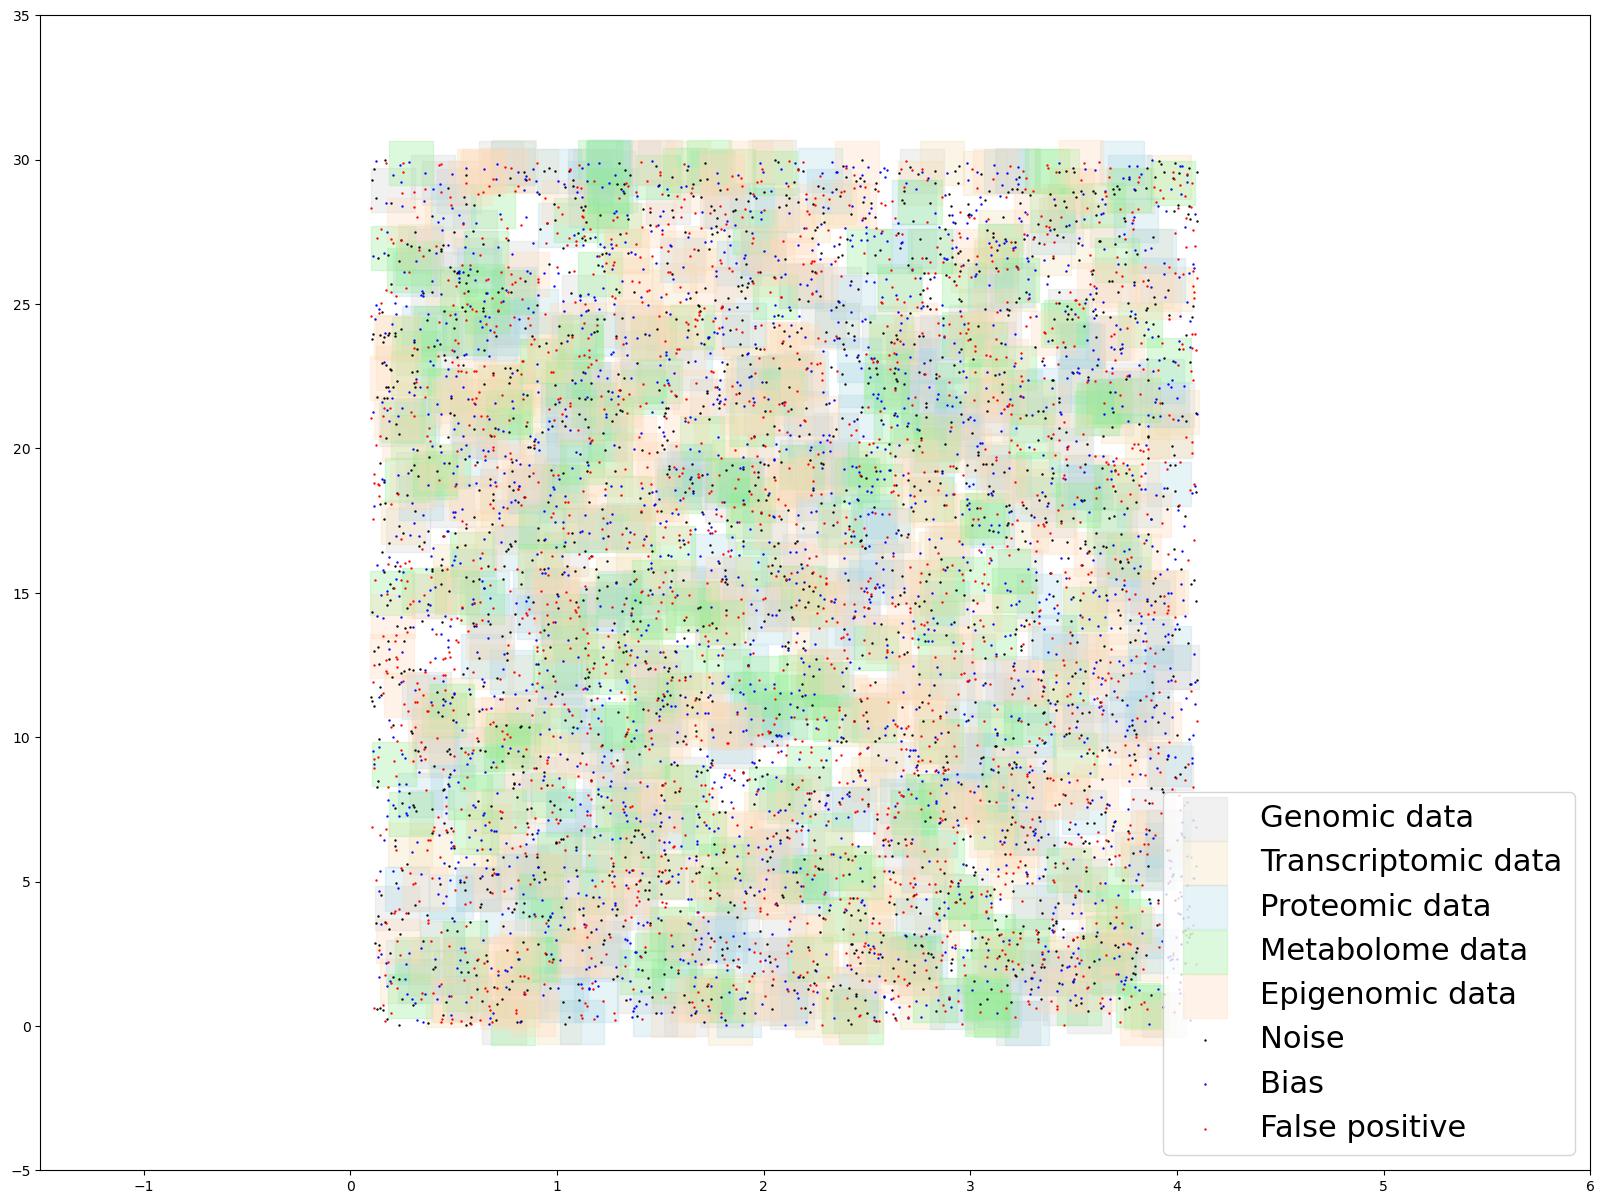

In [150]:
plt.figure(figsize = (20, 15))
dotsize, s_num = 1000, 250
# pos1, pos2 = 0.8, 1.2
y_ax = np.random.uniform(low = 0, high = 30, size = s_num)
colors = ['lightgrey', 'wheat', 'lightblue', 'lightgreen', 'peachpuff']
labels = ['Genomic data', 'Transcriptomic data', 'Proteomic data', 'Metabolome data', 'Epigenomic data']
plt.xlim(-1.5, 6)
plt.ylim(-5, 35)
for i in range(5):
    x_ax = np.random.uniform(low = 0.2, high = 4, size = s_num)
    plt.scatter(x = x_ax, y = y_ax, color = colors[i], marker = 's', alpha = 0.3, s = dotsize, label = labels[i])

errors = ['Noise', 'Bias', 'False positive']
errors_color = ['black', 'blue', 'red']
low_pos, high_pos = 0.7, 2.9
for i in range(3):
    x_ax1 = np.random.uniform(low = 0.1, high = 4.1, size = 2000)
    y_ax1 = np.random.uniform(low = 0, high = 30, size = 2000)
    plt.scatter(x = x_ax1, y = y_ax1, color = errors_color[i], marker = 'o', s = 0.5, label = errors[i])

plt.legend(markerscale = 1, fontsize = 22)
plt.show()